<a href="https://colab.research.google.com/github/FabianaMansilla/DataScience-Ingenias/blob/main/Pre-Entrega2-EQUIPO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Entrega2: Análisis de la Producción de Gas en Argentina (2006-2024)

Este proyecto tiene como objetivo realizar un análisis exploratorio, transformar datos relevantes y por último desarrollar un modelo predictivo de la producción de gas natural en Argentina, aprovechando dos fuentes de datos:

* Conjunto de datos1: Serie histórica de producción de Gas Natural por cuenca y subtipo de recurso (CapítuloIV). Disponible en la sección “Serie histórica de producción de Gas Natural por cuenca y subtipo de recurso (Capítulo IV)” del portal de datos de energía de Argentina.
Enlace: http://datos.energia.gob.ar/dataset/serie-historica-de-produccion-de-gas-natural-por-cuenca-y-sub-tipo-de-recurso-captulo-iv

* Conjunto de datos2: Producción de Pozos de Gas y Petróleo No Convencional. Disponible en la sección “Producción de petróleo y gas por pozo” (no convencional) del portal de datos energía de Argentina.
Enlace: http://datos.energia.gob.ar/dataset/produccion-de-petroleo-y-gas-por-pozo

In [246]:
#Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Carga e inspección Dataset1**

In [247]:
#COMENZAMOS CON EL DATASET1
#Carga del archivo Dataset1
dataset1 = pd.read_csv('serie-histrica-de-produccin-de-gas-natural-por-cuenca-y-sub-tipo-de-recurso-captulo-iv-.csv')

In [248]:
#Inspección Básica
dataset1.head()

,indice_tiempo,produccion_gas_natural_cuenca_austral,produccion_gas_natural_cuenca_gsj,produccion_gas_natural_cuenca_neuquina,produccion_gas_natural_cuenca_noroeste,produccion_gas_natural_cuenca_cuyana,produccion_gas_natural_total,produccion_gas_natural_total_diario,produccion_shale_gas,produccion_tight_gas,participacion_no_convencional
0,2006-01,856179.0548,357316.6790,2.401347e+06,609196.2466,5201.6404,4.229240e+06,136.4271,16.384,32491.62664,0.7686
1,2006-02,779265.9292,309565.3828,2.288115e+06,532122.4430,4273.6100,3.913342e+06,139.7622,13.954,30778.94772,0.7869
2,2006-03,807060.6516,384218.4085,2.507932e+06,588406.1140,5135.2570,4.292752e+06,138.4759,18.104,33024.46882,0.7697
3,2006-04,855962.9924,376149.2286,2.395269e+06,570671.5738,4986.4970,4.203039e+06,140.1013,19.627,31342.49019,0.7462
4,2006-05,905943.5735,409186.6946,2.571095e+06,562752.1099,5265.7730,4.454243e+06,143.6853,19.016,39199.71537,0.8805


In [249]:
#Inspección Básica: Tamaño de dataset1
dataset1.shape

(231, 11)

In [250]:
#Inspección Básica: Nombres columnas dataset1
dataset1.columns

Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_gas_natural_total_diario', 'produccion_shale_gas',
       'produccion_tight_gas', 'participacion_no_convencional'],
      dtype='object')

In [251]:
#Inspección Básica: Análisis de datos faltantes dataset 1
dataset1.isnull().sum()

,0
indice_tiempo,0
produccion_gas_natural_cuenca_austral,0
produccion_gas_natural_cuenca_gsj,0
produccion_gas_natural_cuenca_neuquina,0
produccion_gas_natural_cuenca_noroeste,0
produccion_gas_natural_cuenca_cuyana,0
produccion_gas_natural_total,0
produccion_gas_natural_total_diario,0
produccion_shale_gas,0
produccion_tight_gas,0


**Análisis de Datos Faltantes en el dataset1**

Para verificar la presencia de valores nulos en el dataset1, se utilizó el método .isna().sum(). El resultado muestra que ninguna columna presenta datos faltantes, lo que implica que no es necesario realizar imputación ni eliminación de registros en esta etapa del análisis.

**Visualización Inicial del dataset1**

 Primero convertimos la columna de fecha a datetime para que pandas reconozca la variable como temporal, esto nos permitirá:
*   Poder ordenar correctamente los registros
*   Análisi de series temporales
*   Que matplotlib sitúe los ticks del eje x en fechas de manera automática.

In [252]:
# Asegurarse de que la columna de fechas esté en formato datetime
dataset1['indice_tiempo'] = pd.to_datetime(dataset1['indice_tiempo'])

In [253]:
# Verificamos el cambio
dataset1.dtypes

,0
indice_tiempo,datetime64[ns]
produccion_gas_natural_cuenca_austral,float64
produccion_gas_natural_cuenca_gsj,float64
produccion_gas_natural_cuenca_neuquina,float64
produccion_gas_natural_cuenca_noroeste,float64
produccion_gas_natural_cuenca_cuyana,float64
produccion_gas_natural_total,float64
produccion_gas_natural_total_diario,float64
produccion_shale_gas,float64
produccion_tight_gas,float64


In [254]:
# Ordenar por fecha
dataset1 = dataset1.sort_values('indice_tiempo')

In [255]:
# Filtrar por rango de años (2006 a 2024)
dataset1_filtrado = dataset1[(dataset1['indice_tiempo'].dt.year >= 2006) &
                            (dataset1['indice_tiempo'].dt.year <= 2024)]


**Limitar el Análisis hasta 2024**

Para evitar distorsiones en nuestro análisis y obtener una representación más precisa de las tendencias históricas de producción de gas, se tomó la decisión de limitar el análisis a los datos hasta el año 2024.  Al excluir 2025, nos aseguramos de que todas las comparaciones se realicen entre años completos, lo que permite identificar patrones de crecimiento, fluctuaciones cíclicas y tendencias a largo plazo de manera confiable.

Sin embargo, reconocemos el valor de los datos de 2025 como información reciente que puede ser útil para evaluar la capacidad predictiva de nuestros modelos.  Por lo tanto, planeamos utilizar los datos de 2025 como un conjunto de validación para los modelos de pronóstico, lo que nos permitirá evaluar qué tan bien generalizan a datos nuevos y parcialmente disponibles.

**Comparación de la serie completa vs. últimos 10 años**

A continuación, realizamos una comparación entre la serie histórica completa y los últimos 10 años de datos de producción de gas natural (Dataset 1). El objetivo es analizar si la información más reciente mantiene un comportamiento similar al histórico o si presenta tendencias distintas que justifiquen entrenar un modelo predictivo utilizando únicamente ese período más reciente. Esta comparación nos permitirá tomar decisiones fundamentadas sobre el recorte temporal más adecuado para el análisis y modelado posterior.

In [256]:
#Filtrar últimos 10 años
dataset1_10 = dataset1_filtrado[dataset1_filtrado['indice_tiempo'] >= '2014-01-01']

In [257]:
from scipy.stats import linregress

# 1) Estadísticas descriptivas
estadisticos = {
    'Estadístico': ['Período', 'Promedio', 'Desviación estándar', 'Mínimo', 'Máximo'],
    'Serie completa': [
        f"{dataset1_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset1_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset1_filtrado['produccion_gas_natural_total'].mean(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].std(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].min(), 0),
        round(dataset1_filtrado['produccion_gas_natural_total'].max(), 0)
    ],
    'Últimos 10 años': [
        f"{dataset1_10['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset1_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset1_10['produccion_gas_natural_total'].mean(), 0),
        round(dataset1_10['produccion_gas_natural_total'].std(), 0),
        round(dataset1_10['produccion_gas_natural_total'].min(), 0),
        round(dataset1_10['produccion_gas_natural_total'].max(), 0)
    ]
}
# Creamos y mostramos la tabla
tabla_estadisticos = pd.DataFrame(estadisticos)
print(tabla_estadisticos.to_string(index=False))

# 2) Tendencia lineal (Regresión)
def calcular_tendencia(df, nombre):
    x = range(len(df))
    y = df['produccion_gas_natural_total'].values
    pendiente, intercepto, r_value, _, _ = linregress(x, y)
    print(f"\nTendencia ({nombre}): pendiente={pendiente:.2f}, R²={r_value**2:.3f}")

calcular_tendencia(dataset1_filtrado, "serie completa")
calcular_tendencia(dataset1_10, "últimos 10 años")

# 3) Correlación entre ambas series (en el período en común)
seriecomun = dataset1_filtrado[dataset1_filtrado['indice_tiempo'].isin(dataset1_10['indice_tiempo'])]
correlacion = seriecomun['produccion_gas_natural_total'].corr(dataset1_10['produccion_gas_natural_total'])

print(f"\nCorrelación entre serie completa y últimos 10 años (en el mismo período): {correlacion:.3f}")

        Estadístico    Serie completa   Últimos 10 años
            Período 2006-01 a 2024-12 2014-01 a 2024-12
           Promedio         3897163.0         3848804.0
Desviación estándar          318748.0          308226.0
             Mínimo         3191665.0         3191665.0
             Máximo         4744011.0         4744011.0

Tendencia (serie completa): pendiente=-523.54, R²=0.012

Tendencia (últimos 10 años): pendiente=4909.11, R²=0.371

Correlación entre serie completa y últimos 10 años (en el mismo período): 1.000


Al revisar los datos de producción total de gas natural entre 2006 y 2024, y centrarnos en los últimos 10 años (2014–2024), observamos que el promedio mensual y la variabilidad general apenas cambian. Esto nos indica que la serie reciente refleja fielmente el comportamiento histórico. Además, los valores máximos y mínimos de producción también ocurren dentro de esa última década, por lo que decidimos entrenar nuestro modelo predictivo usando esos 10 años: así nos enfocamos en la dinámica más actual, sin perder de vista los extremos relevantes.

Cabe destacar que cada cuenca tiene un perfil distinto —por ejemplo, la Neuquina ha crecido impulsada por shale, el Noroeste muestra una tendencia a la baja, y la GSJ experimenta caídas puntuales—. Un modelo único para todo el país podría enmascarar estas diferencias. Evaluar cada cuenca por separado nos permitirá:

* Ajustar la tendencia regional, capturando dinámicas propias de cada área.
* Detectar eventos locales (nuevas perforaciones, paradas técnicas) que afectan puntualmente la producción.
* Construir modelos predictivos más precisos, al incorporar las particularidades de cada región.


En resumen, utilizaremos los últimos 10 años como base de nuestro análisis y, simultáneamente, realizaremos un estudio detallado por cuenca para garantizar que el modelo refleje las características específicas de cada zona.

**Análisis Estadisticos Por Cuenca**

In [258]:
# Definir las columnas por cuenca
cuencas = [
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Filtrar últimos 10 años
dataset_10 = dataset1_filtrado[(dataset1_filtrado['indice_tiempo'] >= '2014-01-01') &
                              (dataset1_filtrado['indice_tiempo'] <= '2024-12-31')]

for cuenca in cuencas:
    # Series completas y últimos 10 años
    s_full = dataset1_filtrado[cuenca]
    s10 = dataset_10[cuenca]
    t_full0 = dataset1_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')
    t_full1 = dataset1_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')
    t100 = dataset1_10['indice_tiempo'].iloc[0].strftime('%Y-%m')
    t101 = dataset1_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')

    # Porcentajes no convencionales y convencionales
    shale_full = dataset1_filtrado['produccion_shale_gas']
    tight_full = dataset1_filtrado['produccion_tight_gas']
    no_conv_full = (shale_full + tight_full).clip(upper=s_full)
    porc_no_conv_full = (no_conv_full / s_full * 100).clip(upper=100)
    porc_conv_full = 100 - porc_no_conv_full

    shale_10 = dataset1_10['produccion_shale_gas']
    tight_10 = dataset1_10['produccion_tight_gas']
    s10_safe = s10.replace(0, pd.NA)
    no_conv_10 = (shale_10 + tight_10).clip(upper=s10)
    porc_no_conv_10 = (no_conv_10 / s10_safe * 100).clip(upper=100)
    porc_conv_10 = 100 - porc_no_conv_10

    # Estadísticas descriptivas
    stats = {
        'Estadístico': ['Período', 'Promedio', 'Desviación estándar', 'Mínimo', 'Máximo',
                        'Convencional (%)', 'No convencional (%)'],
        'Serie completa': [
            f'{t_full0} a {t_full1}',
            round(s_full.mean(), 0),
            round(s_full.std(), 0),
            round(s_full.min(), 0),
            round(s_full.max(), 0),
            round(porc_conv_full.mean(), 2),
            round(porc_no_conv_full.mean(), 2)
        ],
        'Últimos 10 años': [
            f'{t100} a {t101}',
            round(s10.mean(), 0),
            round(s10.std(), 0),
            round(s10.min(), 0),
            round(s10.max(), 0),
            round(porc_conv_10.mean(), 2),
            round(porc_no_conv_10.mean(), 2)
        ]
    }

    df_stats = pd.DataFrame(stats)
    print(f'\n=== Estadísticos: {cuenca} ===')
    display(df_stats)

    # Tendencias
    print('--- Tendencias ---')
    def tendencia(s, nombre):
        x = list(range(len(s)))
        y = s.values
        pendiente, _, r_value, _, _ = linregress(x, y)
        print(f'  Tendencia ({nombre}): pendiente={pendiente:.2f}, R²={r_value**2:.3f}')
    tendencia(s_full, 'serie completa')
    tendencia(s10, 'últimos 10 años')

    # Correlación
    comun = s_full[s_full.index.isin(s10.index)]
    corr = comun.corr(s10)
    print(f'Correlación entre ambos períodos: {corr:.3f}')
    print('—' * 40)


=== Estadísticos: produccion_gas_natural_cuenca_neuquina ===


,Estadístico,Serie completa,Últimos 10 años
0,Período,2006-01 a 2024-12,2014-01 a 2024-12
1,Promedio,2335868.0,2414245.0
2,Desviación estándar,336350.0,373497.0
3,Mínimo,1730463.0,1756761.0
4,Máximo,3560944.0,3560944.0
5,Convencional (%),62.93,39.99
6,No convencional (%),37.07,60.01


--- Tendencias ---
  Tendencia (serie completa): pendiente=2196.64, R²=0.186
  Tendencia (últimos 10 años): pendiente=8120.99, R²=0.692
Correlación entre ambos períodos: 1.000
————————————————————————————————————————

=== Estadísticos: produccion_gas_natural_cuenca_austral ===


,Estadístico,Serie completa,Últimos 10 años
0,Período,2006-01 a 2024-12,2014-01 a 2024-12
1,Promedio,861745.0,870852.0
2,Desviación estándar,88081.0,95127.0
3,Mínimo,652089.0,652089.0
4,Máximo,1087217.0,1087217.0
5,Convencional (%),40.66,7.12
6,No convencional (%),59.34,92.88


--- Tendencias ---
  Tendencia (serie completa): pendiente=135.91, R²=0.010
  Tendencia (últimos 10 años): pendiente=-552.27, R²=0.049
Correlación entre ambos períodos: 1.000
————————————————————————————————————————

=== Estadísticos: produccion_gas_natural_cuenca_gsj ===


,Estadístico,Serie completa,Últimos 10 años
0,Período,2006-01 a 2024-12,2014-01 a 2024-12
1,Promedio,405022.0,393128.0
2,Desviación estándar,51463.0,58804.0
3,Mínimo,300492.0,300492.0
4,Máximo,504607.0,504607.0
5,Convencional (%),31.24,0.9
6,No convencional (%),68.76,99.1


--- Tendencias ---
  Tendencia (serie completa): pendiente=-418.26, R²=0.287
  Tendencia (últimos 10 años): pendiente=-1372.11, R²=0.797
Correlación entre ambos períodos: 1.000
————————————————————————————————————————

=== Estadísticos: produccion_gas_natural_cuenca_noroeste ===


,Estadístico,Serie completa,Últimos 10 años
0,Período,2006-01 a 2024-12,2014-01 a 2024-12
1,Promedio,290001.0,166355.0
2,Desviación estándar,168400.0,50148.0
3,Mínimo,98939.0,98939.0
4,Máximo,629453.0,263495.0
5,Convencional (%),28.77,0.0
6,No convencional (%),71.23,100.0


--- Tendencias ---
  Tendencia (serie completa): pendiente=-2432.49, R²=0.908
  Tendencia (últimos 10 años): pendiente=-1284.11, R²=0.959
Correlación entre ambos períodos: 1.000
————————————————————————————————————————

=== Estadísticos: produccion_gas_natural_cuenca_cuyana ===


,Estadístico,Serie completa,Últimos 10 años
0,Período,2006-01 a 2024-12,2014-01 a 2024-12
1,Promedio,4527.0,4225.0
2,Desviación estándar,462.0,319.0
3,Mínimo,3432.0,3432.0
4,Máximo,5564.0,4892.0
5,Convencional (%),0.0,0.0
6,No convencional (%),100.0,100.0


--- Tendencias ---
  Tendencia (serie completa): pendiente=-5.34, R²=0.582
  Tendencia (últimos 10 años): pendiente=-3.39, R²=0.166
Correlación entre ambos períodos: 1.000
————————————————————————————————————————


<ipython-input-259-af7dc3ee1ac6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1_filtrado['produccion_convencional'] = dataset1_filtrado['produccion_gas_natural_total'] - dataset1_filtrado['produccion_shale_gas'] - dataset1_filtrado['produccion_tight_gas']


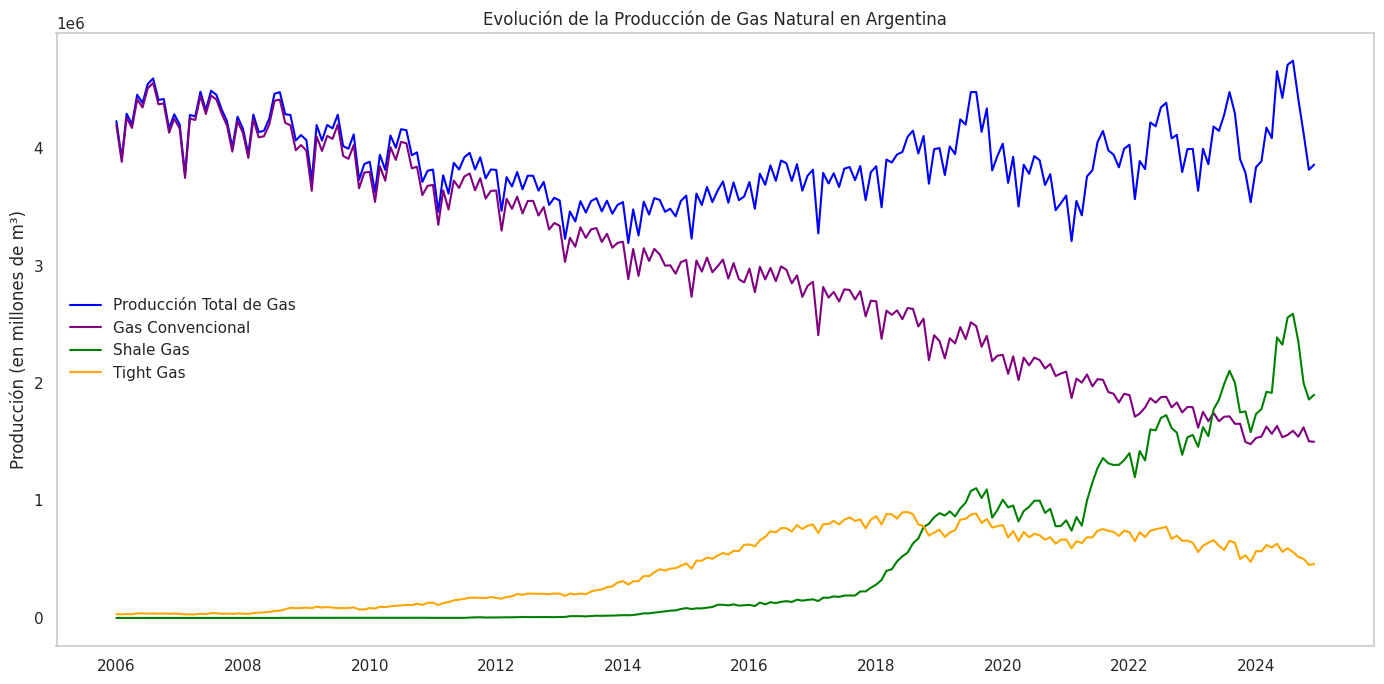

In [259]:
# Calcular producción convencional (total - shale - tight)
dataset1_filtrado['produccion_convencional'] = dataset1_filtrado['produccion_gas_natural_total'] - dataset1_filtrado['produccion_shale_gas'] - dataset1_filtrado['produccion_tight_gas']

# Ordenar por fecha
dataset1_filtrado = dataset1_filtrado.sort_values('indice_tiempo')

# Estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Gráficas
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_gas_natural_total'], label='Producción Total de Gas', color='blue')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_convencional'], label='Gas Convencional', color='purple')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_shale_gas'], label='Shale Gas', color='green')
plt.plot(dataset1_filtrado['indice_tiempo'], dataset1_filtrado['produccion_tight_gas'], label='Tight Gas', color='orange')

# Personalización
plt.ylabel('Producción (en millones de m³)')
plt.title('Evolución de la Producción de Gas Natural en Argentina')
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

Mientras que en el largo plazo la producción de gas natural se ha mantenido estable, los últimos diez años evidencian una etapa de crecimiento moderado pero sostenido, posiblemente impulsado por la expansión de los desarrollos no convencionales en el país.

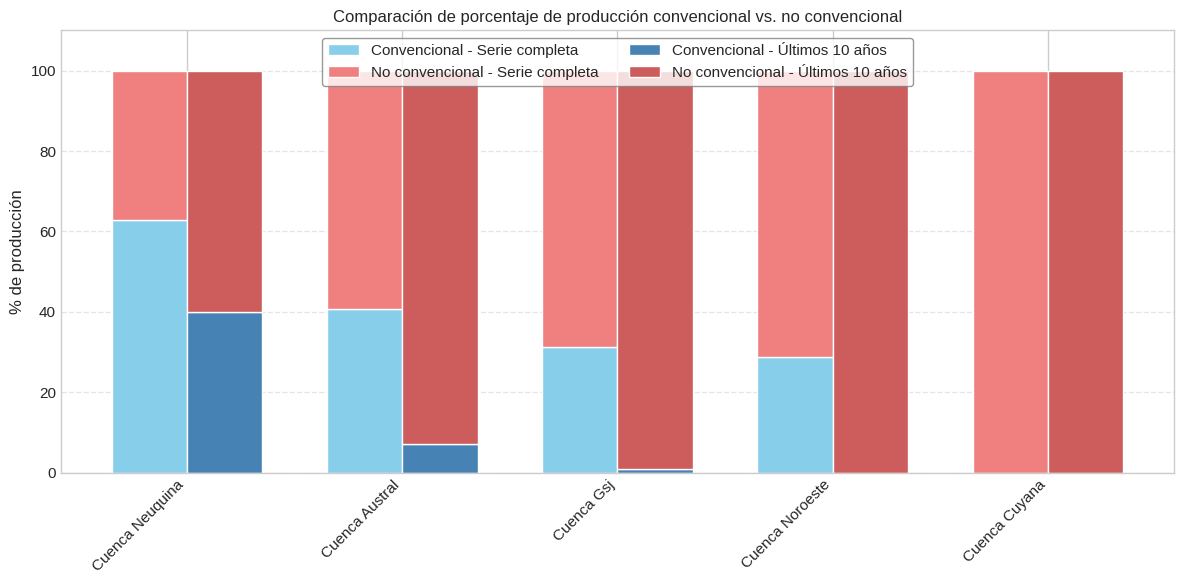

In [321]:
#Serie completa vs Últimos 10 años

import matplotlib.pyplot as plt
import numpy as np

# Listas para guardar resultados
cuencas_nombres = []
conv_full_list = []
no_conv_full_list = []
conv_10_list = []
no_conv_10_list = []

for cuenca in cuencas:
    # Total por cuenca
    total_full = dataset1_filtrado[cuenca]
    shale_full = dataset1_filtrado['produccion_shale_gas']
    tight_full = dataset1_filtrado['produccion_tight_gas']
    no_conv_full = (shale_full + tight_full) / total_full * 100
    no_conv_full = no_conv_full.clip(upper=100)
    conv_full = 100 - no_conv_full

    # Últimos 10 años
    total_10 = dataset_10[cuenca]
    shale_10 = dataset_10['produccion_shale_gas']
    tight_10 = dataset_10['produccion_tight_gas']
    no_conv_10 = (shale_10 + tight_10) / total_10 * 100
    no_conv_10 = no_conv_10.clip(upper=100)
    conv_10 = 100 - no_conv_10

    # Guardar promedios
    cuencas_nombres.append(cuenca.replace('produccion_gas_natural_', '').replace('_', ' ').title())
    conv_full_list.append(conv_full.mean())
    no_conv_full_list.append(no_conv_full.mean())
    conv_10_list.append(conv_10.mean())
    no_conv_10_list.append(no_conv_10.mean())

# Preparar gráfico
x = np.arange(len(cuencas_nombres))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Barras: Serie completa
b1 = ax.bar(x - width/2, conv_full_list, width, label='Convencional - Serie completa', color='skyblue')
b2 = ax.bar(x - width/2, no_conv_full_list, width, bottom=conv_full_list, label='No convencional - Serie completa', color='lightcoral')

# Barras: Últimos 10 años
b3 = ax.bar(x + width/2, conv_10_list, width, label='Convencional - Últimos 10 años', color='steelblue')
b4 = ax.bar(x + width/2, no_conv_10_list, width, bottom=conv_10_list, label='No convencional - Últimos 10 años', color='indianred')

# Estética
ax.set_ylabel('% de producción')
ax.set_title('Comparación de porcentaje de producción convencional vs. no convencional')
ax.set_xticks(x)
ax.set_xticklabels(cuencas_nombres, rotation=45, ha='right')
ax.set_ylim(0, 110)
ax.legend(loc='upper center', frameon=True, facecolor='white', edgecolor='gray', ncol=2)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


En la última década, la industria del gas natural en Argentina ha experimentado un cambio estructural significativo, impulsado por el desarrollo de recursos no convencionales, particularmente en la Cuenca Neuquina. Este cambio ha transformado la matriz productiva del país y tiene implicaciones directas en la forma en que se deben abordar los análisis y modelos predictivos en el sector energético.

🧱 Cambio estructural en la industria
A partir de 2010, la explotación de gas no convencional, especialmente en la formación Vaca Muerta, ha ganado protagonismo en la producción nacional. Según estudios del CONICET, la producción de gas no convencional ha aumentado significativamente, representando casi un 40% de la producción total de gas entre 2010 y 2020. Este crecimiento se debe en parte al declive en la productividad de los pozos convencionales y en parte a la implementación de subsidios por parte del Estado .

Este cambio en la matriz productiva implica que los datos históricos anteriores a esta transformación reflejan una realidad distinta, dominada por la producción convencional. Incluir estos datos en modelos predictivos actuales puede introducir ruido y disminuir la precisión de las proyecciones.

⚙️ Tendencias tecnológicas y políticas recientes
El desarrollo del gas no convencional ha estado acompañado por avances tecnológicos en técnicas de extracción, como la fractura hidráulica, y por políticas públicas que han incentivado la producción mediante subsidios y mejoras en los precios internos. Estas medidas han sido fundamentales para revertir la tendencia declinante de la producción hidrocarburífera que se observaba hasta 2013 .


Además, la necesidad de infraestructura específica, como gasoductos y plantas de licuefacción, ha sido crucial para el desarrollo a gran escala de Vaca Muerta . Estos cambios tecnológicos y regulatorios han creado un nuevo contexto que difiere significativamente del pasado, haciendo que los datos antiguos no reflejen adecuadamente las condiciones actuales y futuras del sector.

🤖 Implicancias para el modelado predictivo
Dado este cambio estructural, es recomendable que los modelos predictivos se basen en datos de los últimos 10 años, período en el cual se ha consolidado la producción no convencional. Esto no solo mejora la relevancia y precisión de las proyecciones, sino que también simplifica los modelos al enfocarse en un conjunto de datos más coherente y representativo del contexto actual.



Bibliogrfía: [El Gas No Convencional de Vaca Muerta como recurso estratégico para la Argentina: evolución y tendencias](https://https://ri.conicet.gov.ar/bitstream/handle/11336/205308/CONICET_Digital_Nro.8c016886-f766-4f67-8851-b367becd8e74_B.pdf?sequence=2&isAllowed=y)




**DECISIÓN:** En resumen, la transformación de la industria del gas natural en Argentina, marcada por el auge del gas no convencional y respaldada por avances tecnológicos y políticas públicas, justifica el enfoque en datos recientes para el análisis y la modelización predictiva.

# **Visualización Dataset1**

**Análisis de Producción Total**

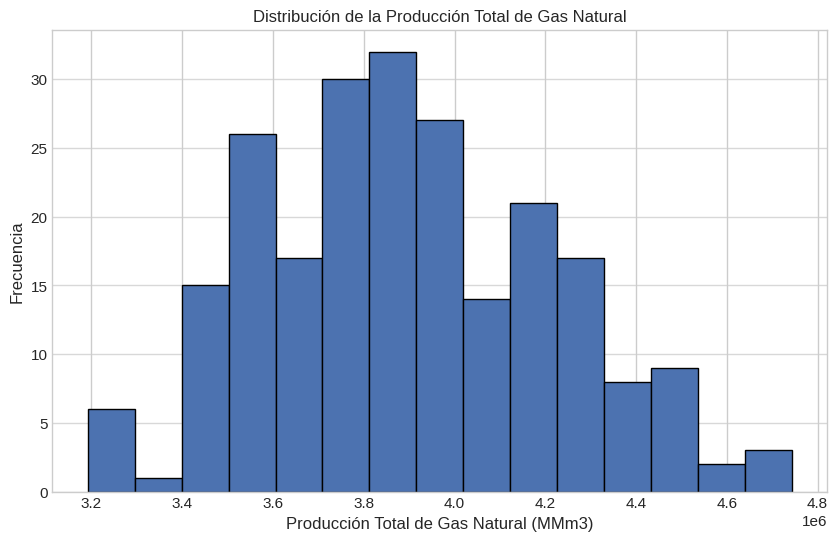

In [322]:
#Histograma- Producción Total


# Asegúrate de que la columna 'produccion_gas_natural_total' exista en tu DataFrame
if 'produccion_gas_natural_total' in dataset1_10.columns:
    # Generar el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(dataset1_filtrado['produccion_gas_natural_total'], bins=15, edgecolor='black')
    plt.title('Distribución de la Producción Total de Gas Natural')
    plt.xlabel('Producción Total de Gas Natural (MMm3)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("La columna 'Producción Total de Gas Natural (MMm3)' no se encontró en el DataFrame.")

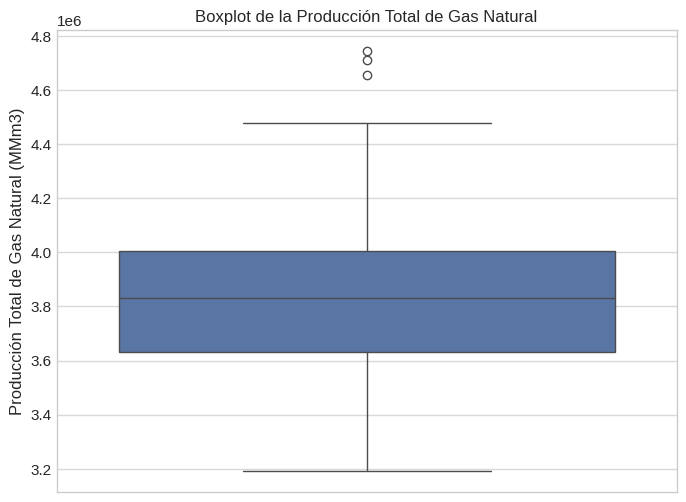

In [323]:
#Boxplot- Producción Total

if 'produccion_gas_natural_total' in dataset1_10.columns:
    # Generar el boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset1_10['produccion_gas_natural_total'])
    plt.title('Boxplot de la Producción Total de Gas Natural')
    plt.ylabel('Producción Total de Gas Natural (MMm3)')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("La columna 'Producción Total de Gas Natural (MMm3)' no se encontró en el DataFrame.")


In [324]:
import pandas as pd

columna = 'produccion_gas_natural_total'

if columna in dataset1_10.columns:
    Q1 = dataset1_10[columna].quantile(0.25)
    Q3 = dataset1_10[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = dataset1_10[(dataset1_10[columna] < limite_inferior) | (dataset1_10[columna] > limite_superior)]
    cantidad_outliers = len(outliers)

    print("Cantidad de Valores Atípicos en la columna '{}': {}".format(columna, cantidad_outliers))

    if cantidad_outliers > 0:
        print("\nValores Atípicos:")
        print(outliers[columna])
    else:
        print("\nNo se encontraron valores atípicos.")
else:
    print("La columna '{}' no se encontró en el DataFrame.".format(columna))

Cantidad de Valores Atípicos en la columna 'produccion_gas_natural_total': 3

Valores Atípicos:
220    4.654371e+06
222    4.709074e+06
223    4.744011e+06
Name: produccion_gas_natural_total, dtype: float64


In [325]:
# Rangos intercuartilicos
Q1 = dataset1_10['produccion_gas_natural_total'].quantile(0.25)
Q3 = dataset1_10['produccion_gas_natural_total'].quantile(0.75)
IQR = Q3 - Q1

# Limite superior para detectar outliers
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = dataset1_10[dataset1_10['produccion_gas_natural_total'] > upper_bound]

print(outliers[['indice_tiempo', 'produccion_gas_natural_total']])

    indice_tiempo  produccion_gas_natural_total
220    2024-05-01                  4.654371e+06
222    2024-07-01                  4.709074e+06
223    2024-08-01                  4.744011e+06


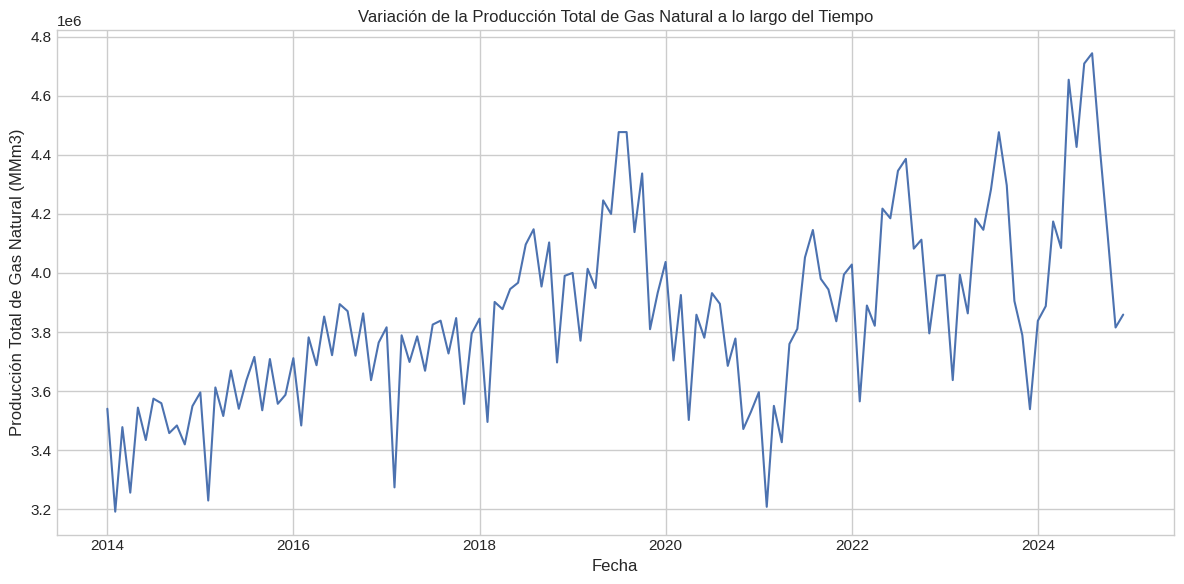

In [326]:
#Variación de la producción a lo largo del tiempo

columna_produccion = 'produccion_gas_natural_total'
columna_fecha = 'indice_tiempo'

if columna_produccion in dataset1_10.columns and columna_fecha in dataset1_10.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=columna_fecha, y=columna_produccion, data=dataset1_10)
    plt.title('Variación de la Producción Total de Gas Natural a lo largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Producción Total de Gas Natural (MMm3)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Asegúrate de que las columnas '{columna_fecha}' y '{columna_produccion}' existan en el DataFrame.")

In [327]:
#Desviación Estándar de outliers

outliers_serie = pd.Series([4.654371e+06, 4.709074e+06, 4.744011e+06])

# Calcular la desviación estándar de los outliers
desviacion_estandar_outliers = outliers_serie.std()

print(f"Desviación Estándar de los Outliers: {desviacion_estandar_outliers:.2f}")

# Ventana de tamaño 2
if len(outliers_serie) >= 2:
    desviacion_estandar_movil_2 = outliers_serie.rolling(window=2).std()
    print("\nDesviación Estándar Móvil (ventana=2):")
    print(desviacion_estandar_movil_2)

# Ventana de tamaño 3
if len(outliers_serie) >= 3:
    desviacion_estandar_movil_3 = outliers_serie.rolling(window=3).std()
    print("\nDesviación Estándar Móvil (ventana=3):")
    print(desviacion_estandar_movil_3)

Desviación Estándar de los Outliers: 45181.75

Desviación Estándar Móvil (ventana=2):
0             NaN
1    38680.862251
2    24704.189614
dtype: float64

Desviación Estándar Móvil (ventana=3):
0            NaN
1            NaN
2    45181.74738
dtype: float64


Dado que solo tenemos tres outliers, el cálculo de la desviación estándar móvil no revela tendencias significativas en la volatilidad de estos puntos atípicos. La desviación estándar simple de los tres valores es la medida más informativa en este caso, indicando que los valores atípicos, aunque significativamente altos en comparación con el resto de los datos, están relativamente cercanos entre sí en magnitud.

In [328]:
#Investigación de outliers

fechas_outliers = pd.to_datetime(['2024-05-01', '2024-07-01', '2024-08-01'])
columnas_cuencas = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Filtrar el DataFrame por las fechas de los outliers
registros_outliers = dataset1_10[dataset1_10['indice_tiempo'].isin(fechas_outliers)].copy()

print("Producción por cuenca (orden descendente) en las fechas de sobreproducción:")
for index, row in registros_outliers.iterrows():
    fecha = row['indice_tiempo'].strftime('%Y-%m-%d')
    produccion_por_cuenca = {}
    for cuenca in columnas_cuencas:
        produccion_por_cuenca[cuenca] = row[cuenca]

    # Ordenar las cuencas por producción en orden descendente
    sorted_cuencas = sorted(produccion_por_cuenca.items(), key=lambda item: item[1], reverse=True)

    print(f"\nFecha: {fecha}")
    for cuenca, produccion in sorted_cuencas:
        print(f"  {cuenca}: {produccion:.2f}")

# Producción Total en las fechas de sobreproducción (sin ordenar)
columna_total = 'produccion_gas_natural_total'
if columna_total in registros_outliers.columns:
    print(f"\nProducción Total en las fechas de sobreproducción:")
    print(registros_outliers[['indice_tiempo', columna_total]])
else:
    print(f"\nLa columna '{columna_total}' no se encontró en los registros de outliers.")

Producción por cuenca (orden descendente) en las fechas de sobreproducción:

Fecha: 2024-05-01
  produccion_gas_natural_cuenca_neuquina: 3439697.65
  produccion_gas_natural_cuenca_austral: 772023.95
  produccion_gas_natural_cuenca_gsj: 333597.13
  produccion_gas_natural_cuenca_noroeste: 104719.05
  produccion_gas_natural_cuenca_cuyana: 4333.64

Fecha: 2024-07-01
  produccion_gas_natural_cuenca_neuquina: 3544369.00
  produccion_gas_natural_cuenca_austral: 744960.72
  produccion_gas_natural_cuenca_gsj: 312646.06
  produccion_gas_natural_cuenca_noroeste: 103516.44
  produccion_gas_natural_cuenca_cuyana: 3581.38

Fecha: 2024-08-01
  produccion_gas_natural_cuenca_neuquina: 3560944.37
  produccion_gas_natural_cuenca_austral: 743659.49
  produccion_gas_natural_cuenca_gsj: 331390.89
  produccion_gas_natural_cuenca_noroeste: 104424.14
  produccion_gas_natural_cuenca_cuyana: 3592.27

Producción Total en las fechas de sobreproducción:
    indice_tiempo  produccion_gas_natural_total
220    2024-05

La sobreproducción de gas natural observada en mayo, julio y agosto de 2024 parece estar fuertemente impulsada por la alta producción de la Cuenca Neuquina. Esto sugiere que cualquier factor que haya afectado la producción total al alza en esas fechas probablemente tuvo un impacto significativo en la actividad productiva de esta cuenca en particular. Las demás cuencas, aunque importantes para la producción general, no parecen ser los principales impulsores de estos picos de sobreproducción.

**DECISIÓN:** Mnatener los outliers ya que son parte de eventos inusuales, pero no errores, que forman parte de la realidad de la producción de gas.

**Análisis de Cuencas**

'produccion_gas_natural_cuenca_austral',
'produccion_gas_natural_cuenca_gsj',
'produccion_gas_natural_cuenca_neuquina,'produccion_gas_natural_cuenca_noroeste', 'produccion_gas_natural_cuenca_cuyana'

Columnas de cuencas encontradas: ['produccion_gas_natural_cuenca_austral', 'produccion_gas_natural_cuenca_gsj', 'produccion_gas_natural_cuenca_neuquina', 'produccion_gas_natural_cuenca_noroeste', 'produccion_gas_natural_cuenca_cuyana']


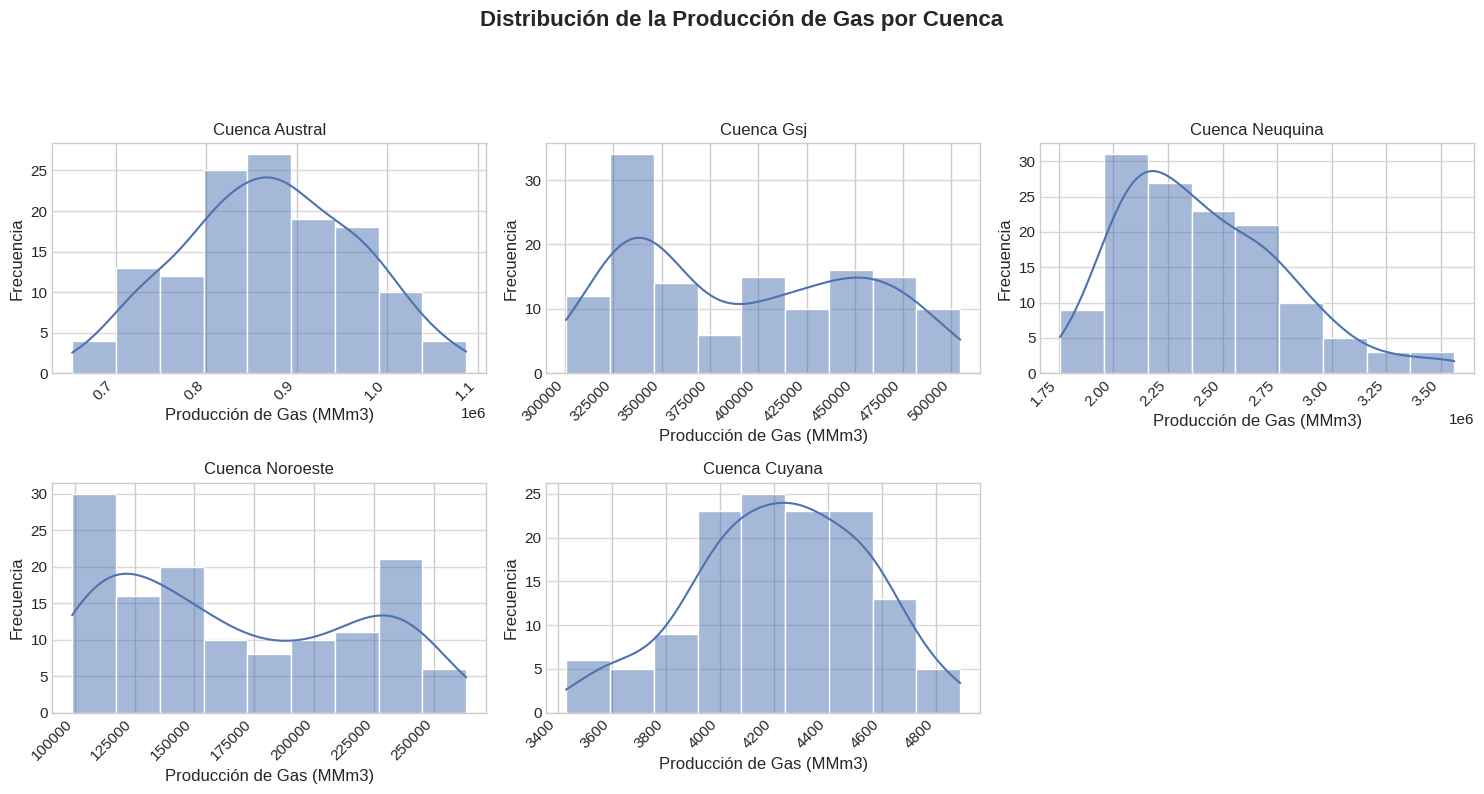

In [329]:
#Análisis por cuencas
cuencas_cols = [col for col in dataset1_10.columns if 'produccion_gas_natural_cuenca_' in col]
print(f"Columnas de cuencas encontradas: {cuencas_cols}")

# Definir el número de filas y columnas para los subplots
n_filas = 2
n_cols = 3

# Crear la figura con los subplots
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 8))
fig.suptitle('Distribución de la Producción de Gas por Cuenca', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes
axes = axes.flatten()

# Iterar sobre las columnas de las cuencas y crear un histograma para cada una
for i, cuenca_col in enumerate(cuencas_cols):
    if i < len(axes):
        sns.histplot(dataset1_10[cuenca_col], kde=True, ax=axes[i])
        cuenca_nombre = cuenca_col.replace('produccion_gas_natural_cuenca_', '').replace('_', ' ').title()
        axes[i].set_title(f'Cuenca {cuenca_nombre}')
        axes[i].set_xlabel('Producción de Gas (MMm3)')
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(axis='y', alpha=0.75)
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right") # Rotar etiquetas del eje x

# Eliminar los subplots vacíos
if len(cuencas_cols) < n_filas * n_cols:
    for j in range(len(cuencas_cols), n_filas * n_cols):
        fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

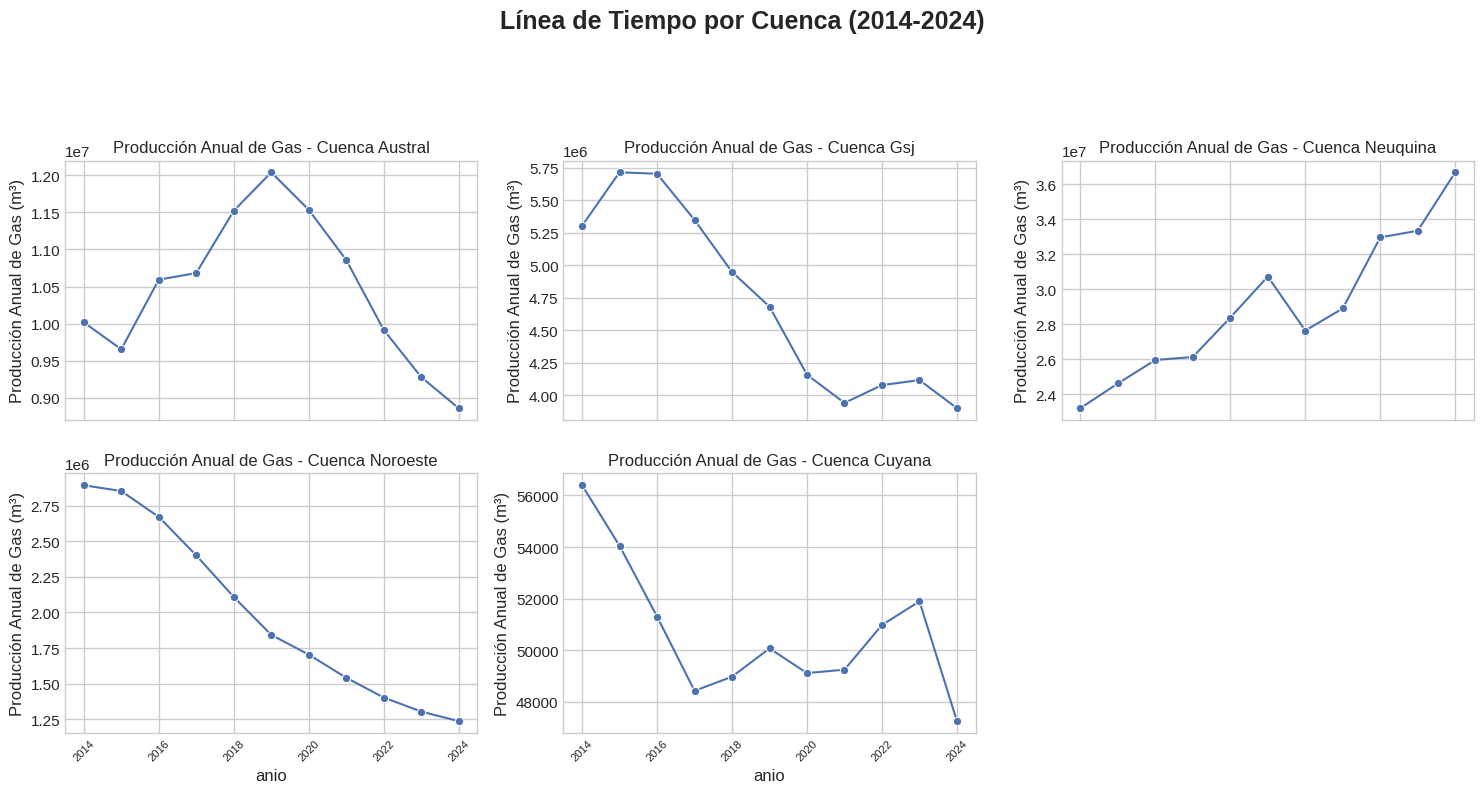

In [330]:
#Linea- Producción Cuencas

# 1. Preparar los datos
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year

# Lista de todas las columnas de cuencas
cuencas_cols = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Definir el número de filas y columnas para los subplots
n_filas = 2
n_cols = 3

# Crear una figura con los subplots
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 8), sharex=True)

# Título general para todos los gráficos
fig.suptitle('Línea de Tiempo por Cuenca (2014-2024)', fontsize=18, fontweight='bold', y=1.02)

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas de las cuencas y crear un gráfico para cada una
for i, cuenca_col in enumerate(cuencas_cols):
    # Seleccionar los datos de la cuenca actual
    dataset_cuenca = dataset1_10[['anio', cuenca_col]].copy()

    # Agrupar por año y sumar la producción
    dataset_cuenca_anual = dataset_cuenca.groupby('anio', as_index=False).sum()

    # Graficar la producción de gas a lo largo del tiempo
    sns.lineplot(x='anio', y=cuenca_col, data=dataset_cuenca_anual, marker='o', ax=axes[i])

    # Personalizar el título y las etiquetas del eje y
    cuenca_nombre = cuenca_col.replace('produccion_gas_natural_cuenca_', '').replace('_', ' ').title()
    axes[i].set_title(f'Producción Anual de Gas - Cuenca {cuenca_nombre}')
    axes[i].set_ylabel('Producción Anual de Gas (m³)')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

# Eliminar los subplots vacíos si hay menos cuencas que el número total de subplots
if len(cuencas_cols) < n_filas * n_cols:
    for j in range(len(cuencas_cols), n_filas * n_cols):
        fig.delaxes(axes[j])

# Ajustar el diseño para evitar superposiciones
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

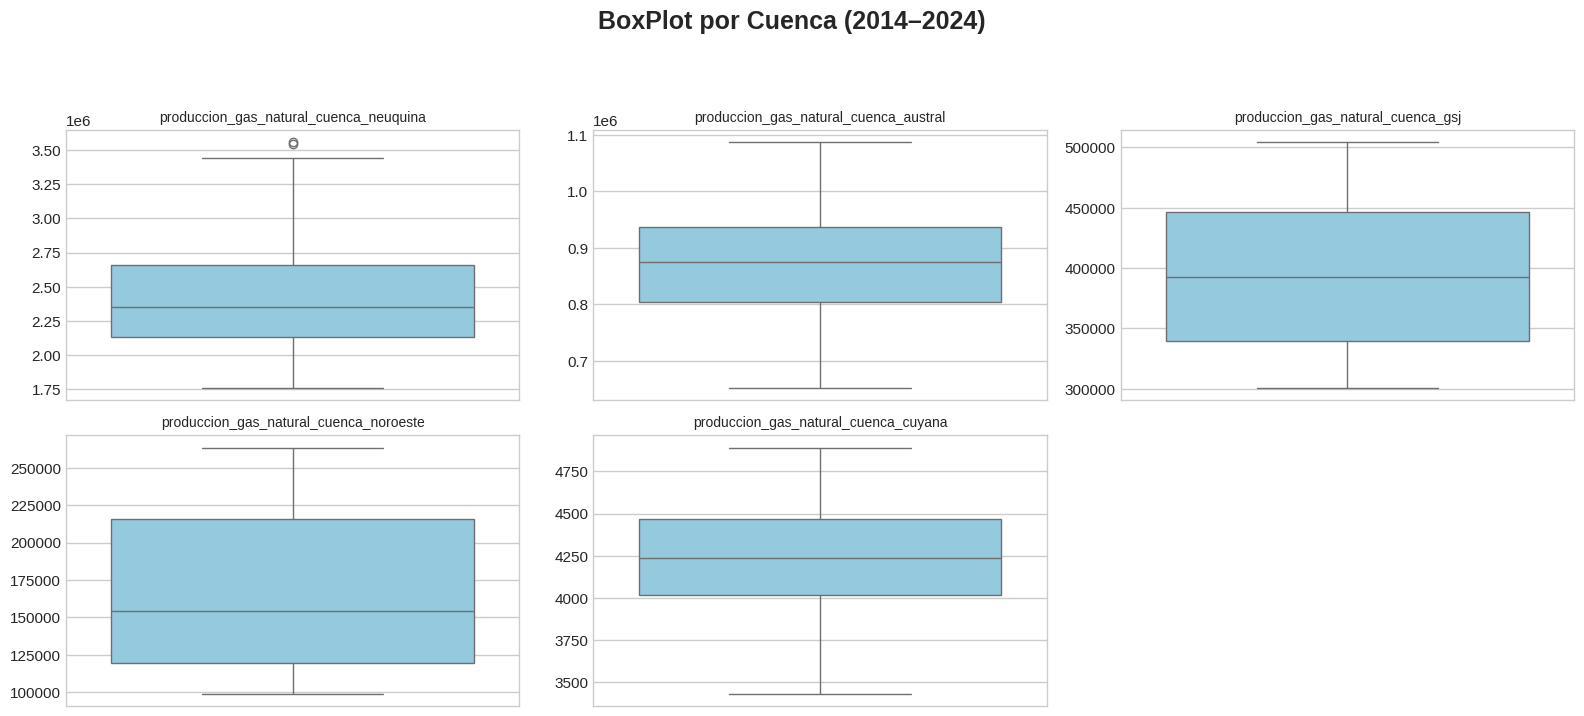

In [331]:
#Boxplot- Producción Cuencas

# Asegurarse de que 'indice_tiempo' sea datetime
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year

# Columnas numéricas a graficar
columnas_numericas = [
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana'
]

# Crear los boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=dataset1_10[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

# Título general
plt.suptitle('BoxPlot por Cuenca (2014–2024)', fontsize=18, fontweight='bold', y=1.02)

# Ajuste final
plt.subplots_adjust(top=0.9)
plt.show()

In [333]:
# Identificar valores atípicos en cuenca neuquina

columna = 'produccion_gas_natural_cuenca_neuquina'

# Filtrar el DataFrame para el período 2014-2024

df_periodo = dataset1_10[(dataset1_10['anio'] >= 2014) & (dataset1_10['anio'] <= 2024)].copy()

if columna in df_periodo.columns:
    Q1 = df_periodo[columna].quantile(0.25)
    Q3 = df_periodo[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df_periodo[(df_periodo[columna] < limite_inferior) | (df_periodo[columna] > limite_superior)]
    cantidad_outliers = len(outliers)

    print(f"Cantidad de Valores Atípicos en la columna '{columna}' (2014-2024): {cantidad_outliers}")

    if cantidad_outliers > 0:
        print("\nValores Atípicos (2014-2024):")
        print(outliers[[columna, 'indice_tiempo']])  # Mostrar la fecha para investigar
    else:
        print("\nNo se encontraron valores atípicos (2014-2024).")
else:
    print(f"La columna '{columna}' no se encontró en el DataFrame filtrado.")

Cantidad de Valores Atípicos en la columna 'produccion_gas_natural_cuenca_neuquina' (2014-2024): 2

Valores Atípicos (2014-2024):
     produccion_gas_natural_cuenca_neuquina indice_tiempo
222                            3.544369e+06    2024-07-01
223                            3.560944e+06    2024-08-01


Los dos valores atípicos identificados en la producción de la Cuenca Neuquina para julio y agosto de 2024, coinciden con dos de los tres valores identificados como outliers en la Producción Total de Gas, por lo que su tratamiento sera igual que en el analisis de dicho feature.


**DECISIÓN:** Estos valores se mantendrán en el análisis, en coherencia con la decisión tomada para los picos de sobreproducción observados en la producción total de gas durante las mismas fechas. Estos valores no son errores, sino que reflejan eventos reales que impactaron significativamente la producción de la cuenca, contribuyendo a la sobreproducción general. Conservarlos asegura la integridad del registro histórico de la Cuenca Neuquina y permite comprender su respuesta ante eventos inusuales, proporcionando información valiosa para el análisis.

**Análisis de Tipo de Gas: Convencional- No Convencional**


'participacion_convencional', 'participacion_no_convencional'

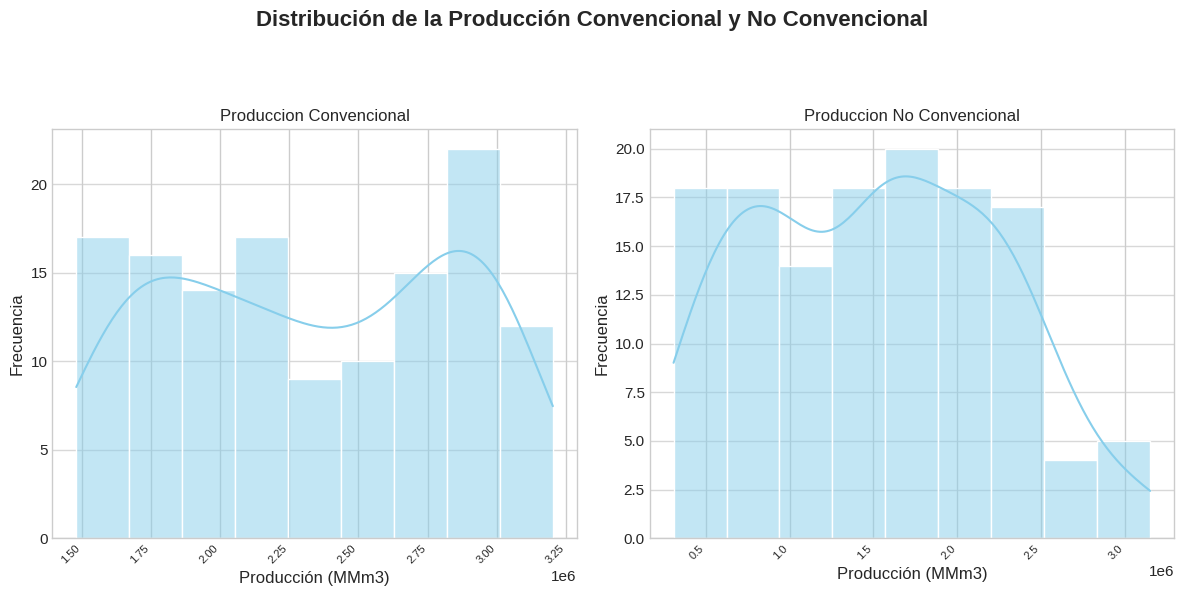

In [334]:
#Histograma-Tipo de Gas: Convencional- No Convencional

# Calcular la producción no convencional total
dataset1_10['produccion_no_convencional'] = dataset1_10['produccion_shale_gas'] + dataset1_10['produccion_tight_gas']

# Calcular la producción convencional restando la no convencional de la total
dataset1_10['produccion_convencional'] = dataset1_10['produccion_gas_natural_total'] - dataset1_10['produccion_no_convencional']

# Columnas para el primer histograma
cols_convencional_no_convencional = [
    'produccion_convencional',
    'produccion_no_convencional'
]

# Crear la primera figura con subplots
fig1, axes1 = plt.subplots(1, len(cols_convencional_no_convencional), figsize=(12, 6))
fig1.suptitle('Distribución de la Producción Convencional y No Convencional', fontsize=16, fontweight='bold', y=1.02)

axes1 = axes1.flatten() if len(cols_convencional_no_convencional) > 1 else [axes1]

for i, col in enumerate(cols_convencional_no_convencional):
    sns.histplot(dataset1_10[col], kde=True, ax=axes1[i], color='skyblue')
    col_nombre = col.replace('_', ' ').title()
    axes1[i].set_title(f'{col_nombre}')
    axes1[i].set_xlabel('Producción (MMm3)')
    axes1[i].set_ylabel('Frecuencia')
    axes1[i].grid(axis='y', alpha=0.75)
    plt.setp(axes1[i].get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

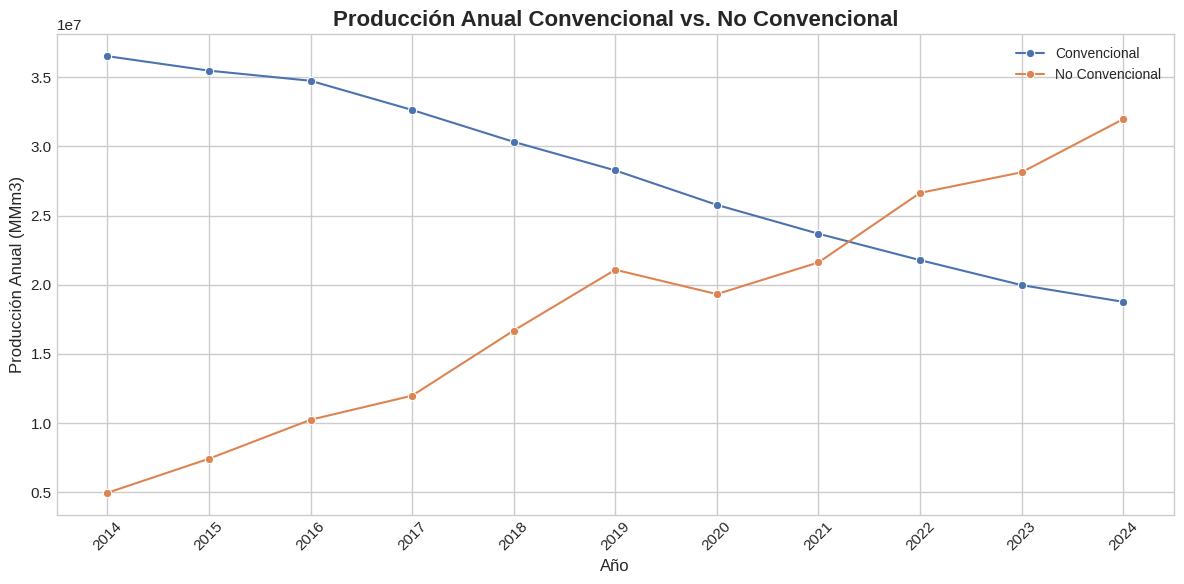

In [335]:
#Linea de Tiempo -Tipo de Gas: Convencional- No Convencional

# Agrupar por año y sumar la producción convencional y no convencional
produccion_anual = dataset1_10.groupby('anio', as_index=False)[['produccion_convencional', 'produccion_no_convencional']].sum()

# Crear la figura y el subplot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid') # Opcional: mejora el estilo

# Graficar la producción convencional
sns.lineplot(x='anio', y='produccion_convencional', data=produccion_anual, marker='o', label='Convencional')

# Graficar la producción no convencional
sns.lineplot(x='anio', y='produccion_no_convencional', data=produccion_anual, marker='o', label='No Convencional')

# Personalizar el gráfico
plt.title('Producción Anual Convencional vs. No Convencional', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Anual (MMm3)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(produccion_anual['anio'].unique().astype(int), rotation=45)
plt.tight_layout()
plt.show()

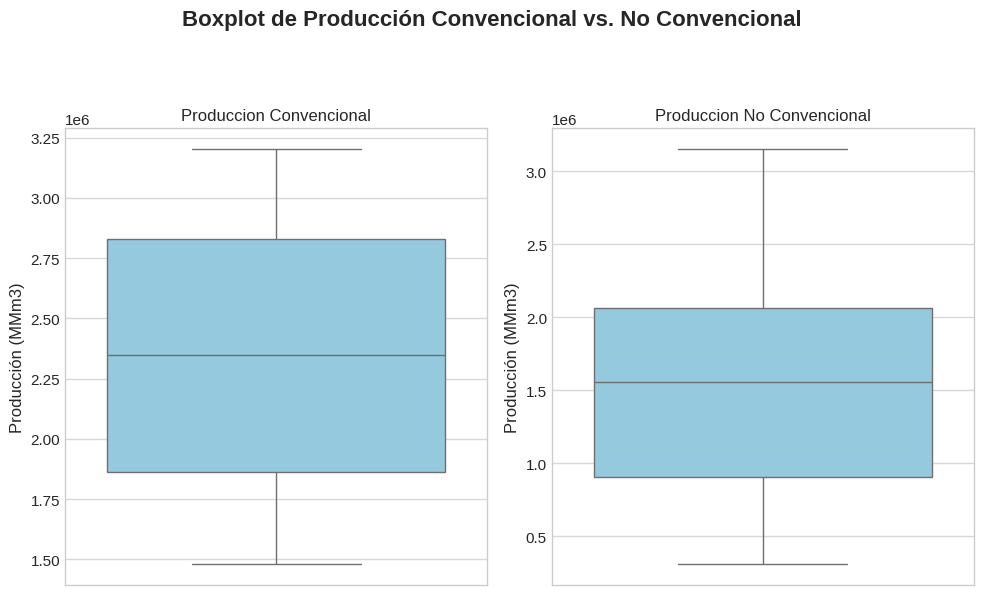

In [336]:
#Boxplot-Tipo de Gas: Convencional- No Convencional

# Columnas para el boxplot
cols_convencional_no_convencional = [
    'produccion_convencional',
    'produccion_no_convencional'
]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(cols_convencional_no_convencional), figsize=(10, 6))
fig.suptitle('Boxplot de Producción Convencional vs. No Convencional', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes si solo hay un subplot
if len(cols_convencional_no_convencional) == 1:
    axes = [axes]

# Iterar sobre las columnas y crear un boxplot para cada una
for i, col in enumerate(cols_convencional_no_convencional):
    sns.boxplot(y=dataset1_10[col], ax=axes[i], color='skyblue')
    col_nombre = col.replace('_', ' ').title()
    axes[i].set_title(col_nombre)
    axes[i].set_ylabel('Producción (MMm3)')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Análisis de No Convencinal: Shale-Tight**


'produccion_shale_gas',
'produccion_tight_gas'

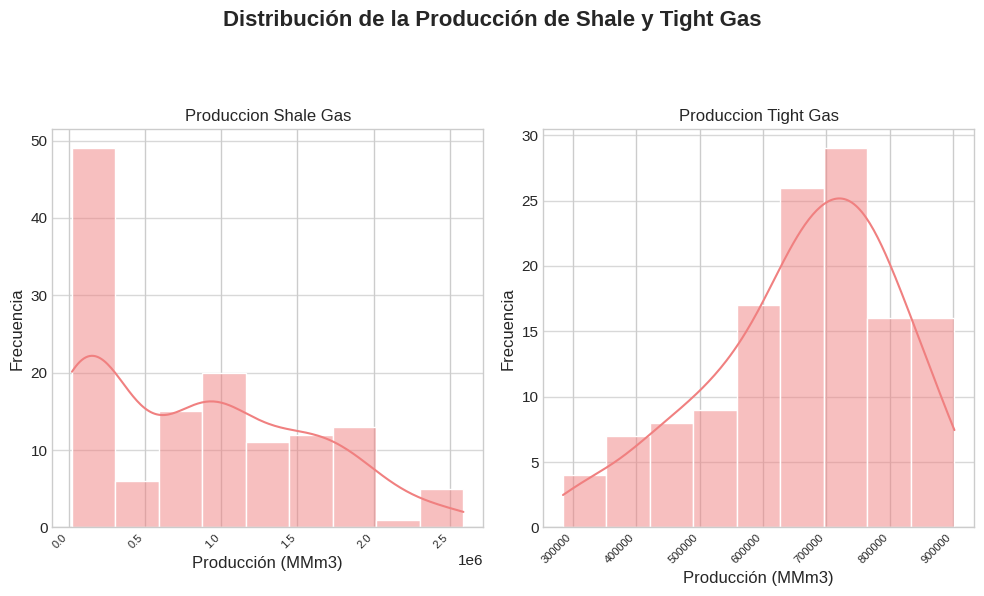

In [337]:
#Histograma:  No Convencinal: Shale-Tight

# Columnas para el segundo histograma
cols_shale_tight = [
    'produccion_shale_gas',
    'produccion_tight_gas'
]

# Crear la segunda figura con subplots
fig2, axes2 = plt.subplots(1, len(cols_shale_tight), figsize=(10, 6))
fig2.suptitle('Distribución de la Producción de Shale y Tight Gas', fontsize=16, fontweight='bold', y=1.02)

axes2 = axes2.flatten() if len(cols_shale_tight) > 1 else [axes2]

for i, col in enumerate(cols_shale_tight):
    sns.histplot(dataset1_10[col], kde=True, ax=axes2[i], color='lightcoral')
    col_nombre = col.replace('_', ' ').title()
    axes2[i].set_title(f'{col_nombre}')
    axes2[i].set_xlabel('Producción (MMm3)')
    axes2[i].set_ylabel('Frecuencia')
    axes2[i].grid(axis='y', alpha=0.75)
    plt.setp(axes2[i].get_xticklabels(), rotation=45, ha="right", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

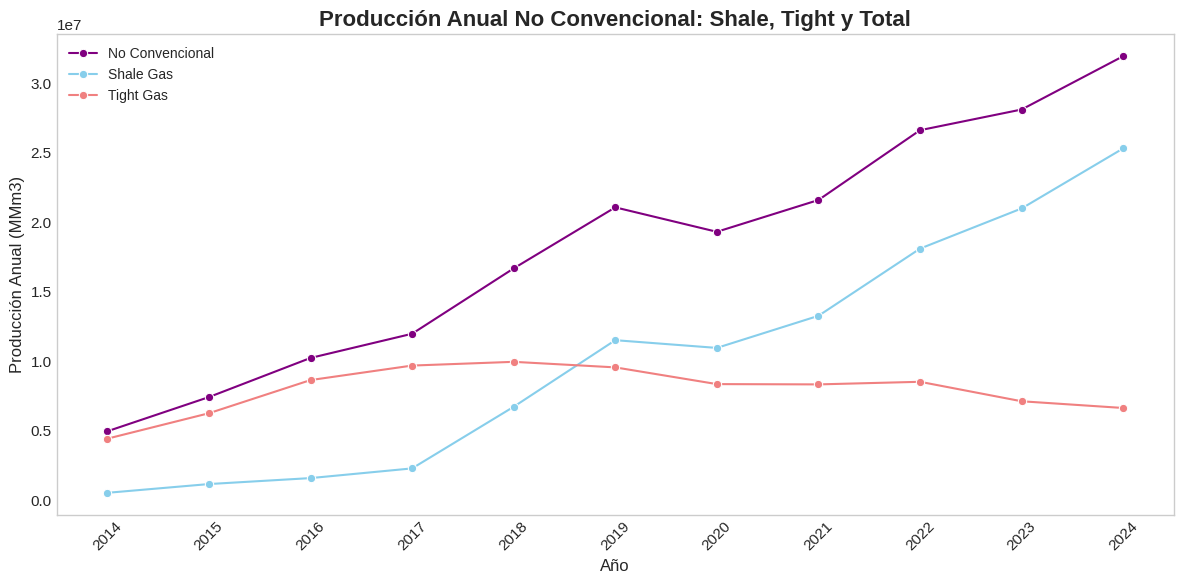

In [338]:
#Linea de Tiempo:  No Convencinal: Shale-Tight

# Calcular la producción no convencional total
if 'produccion_no_convencional' not in dataset1_10.columns:
    dataset1_10['produccion_no_convencional'] = dataset1_10['produccion_shale_gas'] + dataset1_10['produccion_tight_gas']

# Agrupar por año y sumar la producción
produccion_anual_no_convencional = dataset1_10.groupby('anio', as_index=False)[['produccion_shale_gas', 'produccion_tight_gas', 'produccion_no_convencional']].sum()

# Crear la figura y el subplot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')

# Graficar la producción no convencional total
sns.lineplot(x='anio', y='produccion_no_convencional', data=produccion_anual_no_convencional, marker='o', label='No Convencional', color='purple')

# Graficar la producción de shale gas
sns.lineplot(x='anio', y='produccion_shale_gas', data=produccion_anual_no_convencional, marker='o', label='Shale Gas', color='skyblue')

# Graficar la producción de tight gas
sns.lineplot(x='anio', y='produccion_tight_gas', data=produccion_anual_no_convencional, marker='o', label='Tight Gas', color='lightcoral')

# Personalizar el gráfico
plt.title('Producción Anual No Convencional: Shale, Tight y Total', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Anual (MMm3)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(False)
plt.xticks(produccion_anual_no_convencional['anio'].unique().astype(int), rotation=45)
plt.tight_layout()
plt.show()

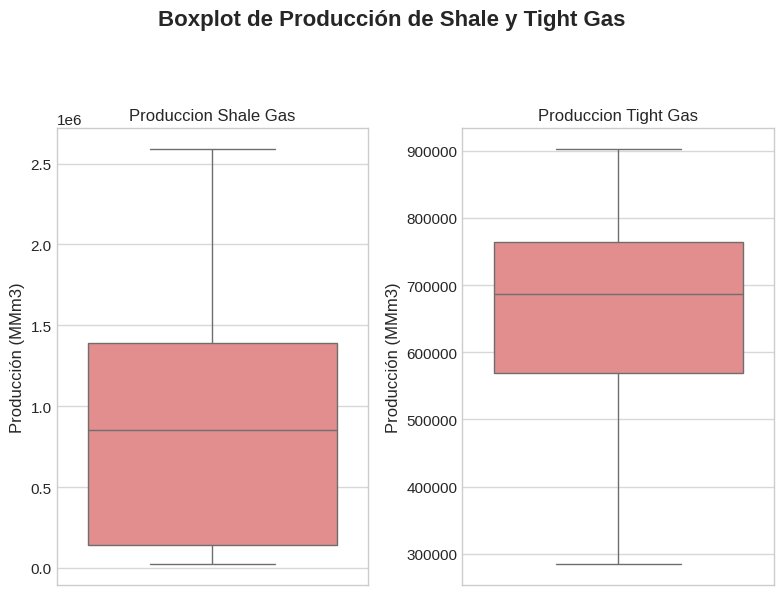

In [339]:
#Boxplot:  No Convencinal: Shale-Tight

# Columnas para el boxplot
cols_shale_tight = [
    'produccion_shale_gas',
    'produccion_tight_gas'
]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, len(cols_shale_tight), figsize=(8, 6))
fig.suptitle('Boxplot de Producción de Shale y Tight Gas', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes si solo hay un subplot
if len(cols_shale_tight) == 1:
    axes = [axes]

# Iterar sobre las columnas y crear un boxplot para cada una
for i, col in enumerate(cols_shale_tight):
    sns.boxplot(y=dataset1_10[col], ax=axes[i], color='lightcoral')
    col_nombre = col.replace('_', ' ').title()
    axes[i].set_title(col_nombre)
    axes[i].set_ylabel('Producción (MMm3)')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Transformación de Datos del Dataset1**

In [340]:
# Indice_tiempo pasar a 'anio' y 'mes'

# Asegurémonos de que la columna 'indice_tiempo' sea de tipo datetime
dataset1_10['indice_tiempo'] = pd.to_datetime(dataset1_10['indice_tiempo'])

# Crear la columna 'anio' como entero
dataset1_10['anio'] = dataset1_10['indice_tiempo'].dt.year.astype(int)

# Crear la columna 'mes' como entero
dataset1_10['mes'] = dataset1_10['indice_tiempo'].dt.month.astype(int)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(dataset1_10[['indice_tiempo', 'anio', 'mes']].head())

# Verificar los tipos de datos de las nuevas columnas
print("\nTipos de datos de las nuevas columnas:")
print(dataset1_10[['anio', 'mes']].dtypes)

    indice_tiempo  anio  mes
96     2014-01-01  2014    1
97     2014-02-01  2014    2
98     2014-03-01  2014    3
99     2014-04-01  2014    4
100    2014-05-01  2014    5

Tipos de datos de las nuevas columnas:
anio    int64
mes     int64
dtype: object


In [341]:
#Eliminar feature Produccion_gas_natural_total_diario

# Verificar si la columna existe antes de intentar eliminarla
if 'produccion_gas_natural_total_diario' in dataset1_10.columns:
    # Eliminar la columna
    dataset1_10 = dataset1_10.drop(columns=['produccion_gas_natural_total_diario'])
    print("La columna 'produccion_gas_natural_total_diario' ha sido eliminada.")
else:
    print("La columna 'produccion_gas_natural_total_diario' no existe en el DataFrame.")

# Verificar que la columna ya no está en el DataFrame
print("\nColumnas actuales del DataFrame:")
print(dataset1_10.columns)

La columna 'produccion_gas_natural_total_diario' no existe en el DataFrame.

Columnas actuales del DataFrame:
Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


In [342]:
#Eliminar 'participacion_no_convencional'

# Verificar si la columna existe antes de intentar eliminarla
if 'participacion_no_convencional' in dataset1_10.columns:
    # Eliminar la columna
    dataset1_10 = dataset1_10.drop(columns=['participacion_no_convencional'])
    print("La columna 'participacion_no_convencional' ha sido eliminada.")
else:
    print("La columna 'participacion_no_convencional' no existe en el DataFrame.")

# Verificar que la columna ya no está en el DataFrame imprimiendo las columnas
print("\nColumnas actuales del DataFrame:")
print(dataset1_10.columns)

La columna 'participacion_no_convencional' no existe en el DataFrame.

Columnas actuales del DataFrame:
Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


**Normalización de Datos del Dataset1**

In [343]:
#StandardScaler para 'produccion_gas_natural_total' y 'produccion_gas_natural_cuenca_neuquina'

from sklearn.preprocessing import StandardScaler

def aplicar_standard_scaler(df, columnas):

    dataset1_10_escalado = dataset1_10.copy()
    scaler = StandardScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(dataset1_10[columnas])
    return dataset1_10_escalado

# Columnas a escalar con StandardScaler
columnas_a_escalar = ['produccion_gas_natural_total', 'produccion_gas_natural_cuenca_neuquina']

# Aplicar la función de escalado
dataset1_10_escalado_standard = aplicar_standard_scaler(dataset1_10, columnas_a_escalar)

# Mostrar las primeras filas de las columnas originales y escaladas para comparar
print("Primeras filas de las columnas originales:")
print(dataset1_10[columnas_a_escalar].head())

print("\nPrimeras filas de las columnas escaladas con StandardScaler:")
print(dataset1_10_escalado_standard[columnas_a_escalar].head())

# Puedes verificar las medias y desviaciones estándar aproximadas de las columnas escaladas
print("\nMedias de las columnas escaladas:")
print(dataset1_10_escalado_standard[columnas_a_escalar].mean())

print("\nDesviaciones estándar de las columnas escaladas:")
print(dataset1_10_escalado_standard[columnas_a_escalar].std())

Primeras filas de las columnas originales:
     produccion_gas_natural_total  produccion_gas_natural_cuenca_neuquina
96                   3.540197e+06                            1.944920e+06
97                   3.191665e+06                            1.756761e+06
98                   3.477941e+06                            1.885451e+06
99                   3.256041e+06                            1.833150e+06
100                  3.543987e+06                            1.966218e+06

Primeras filas de las columnas escaladas con StandardScaler:
     produccion_gas_natural_total  produccion_gas_natural_cuenca_neuquina
96                      -1.005051                               -1.261356
97                      -2.140127                               -1.767052
98                      -1.207802                               -1.421184
99                      -1.930469                               -1.561747
100                     -0.992709                               -1.204116

Medias

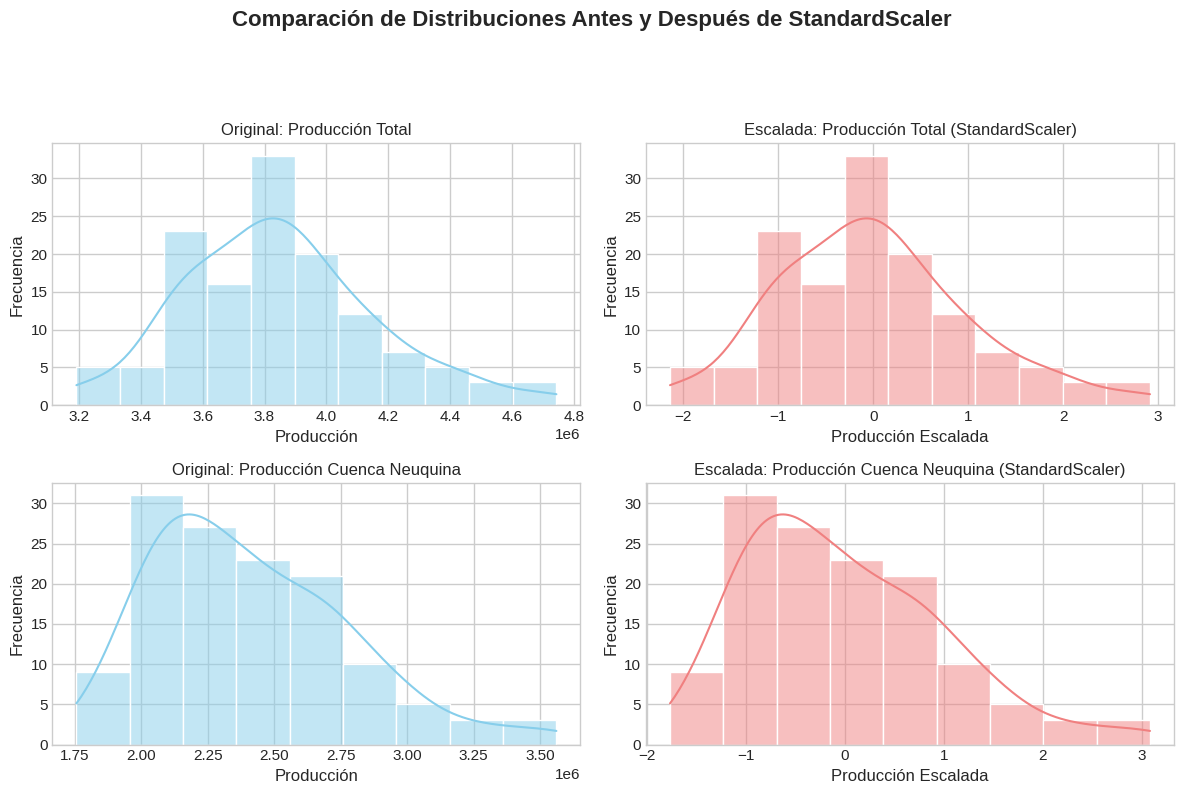

In [344]:
# Gráficos comparativos antes y despues del StandarScaler
def aplicar_standard_scaler(df, columnas):

    dataset1_10_escalado = df.copy()
    scaler = StandardScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(df[columnas])
    return dataset1_10_escalado

# Columnas a escalar
columnas_a_escalar = ['produccion_gas_natural_total', 'produccion_gas_natural_cuenca_neuquina']

# Aplicar StandardScaler
dataset1_10_escalado_standard = aplicar_standard_scaler(dataset1_10.copy(), columnas_a_escalar)

# Crear la figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparación de Distribuciones Antes y Después de StandardScaler', fontsize=16, fontweight='bold', y=1.02)

# Histograma de 'produccion_gas_natural_total' original
sns.histplot(dataset1_10['produccion_gas_natural_total'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original: Producción Total')
axes[0, 0].set_xlabel('Producción')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_total' escalada
sns.histplot(dataset1_10_escalado_standard['produccion_gas_natural_total'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Escalada: Producción Total (StandardScaler)')
axes[0, 1].set_xlabel('Producción Escalada')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_cuenca_neuquina' original
sns.histplot(dataset1_10['produccion_gas_natural_cuenca_neuquina'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Original: Producción Cuenca Neuquina')
axes[1, 0].set_xlabel('Producción')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma de 'produccion_gas_natural_cuenca_neuquina' escalada
sns.histplot(dataset1_10_escalado_standard['produccion_gas_natural_cuenca_neuquina'], kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Escalada: Producción Cuenca Neuquina (StandardScaler)')
axes[1, 1].set_xlabel('Producción Escalada')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [345]:
# MinMax Scaler para producción por cuenca, por tipo, convencional y no convencional

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def aplicar_minmax_scaler(df, columnas):

    dataset1_10_escalado = df.copy()
    scaler = MinMaxScaler()
    dataset1_10_escalado[columnas] = scaler.fit_transform(df[columnas])
    return dataset1_10_escalado

# Columnas a escalar con MinMaxScaler
columnas_a_escalar_minmax = [
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana',
    'produccion_shale_gas',
    'produccion_tight_gas',
    'produccion_no_convencional',
    'produccion_convencional'
]

# Aplicar la función de escalado MinMaxScaler
dataset1_10_escalado_minmax = aplicar_minmax_scaler(dataset1_10.copy(), columnas_a_escalar_minmax)

# Mostrar las primeras filas de las columnas originales y escaladas para comparar
print("Primeras filas de las columnas originales:")
print(dataset1_10[columnas_a_escalar_minmax].head())

print("\nPrimeras filas de las columnas escaladas con MinMaxScaler:")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].head())

# Puedes verificar los valores mínimos y máximos aproximados de las columnas escaladas
print("\nValores mínimos de las columnas escaladas (MinMaxScaler):")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].min())

print("\nValores máximos de las columnas escaladas (MinMaxScaler):")
print(dataset1_10_escalado_minmax[columnas_a_escalar_minmax].max())

Primeras filas de las columnas originales:
     produccion_gas_natural_cuenca_austral  produccion_gas_natural_cuenca_gsj  \
96                             885167.3714                        442014.6605   
97                             793800.6656                        403246.2098   
98                             879715.0346                        453502.3597   
99                             740749.0121                        438266.3703   
100                            880061.9141                        445484.1645   

     produccion_gas_natural_cuenca_noroeste  \
96                              263495.3680   
97                              233504.3885   
98                              254380.6826   
99                              239112.5697   
100                             247344.8389   

     produccion_gas_natural_cuenca_cuyana  produccion_shale_gas  \
96                              4599.6114          23465.959800   
97                              4352.7275          22

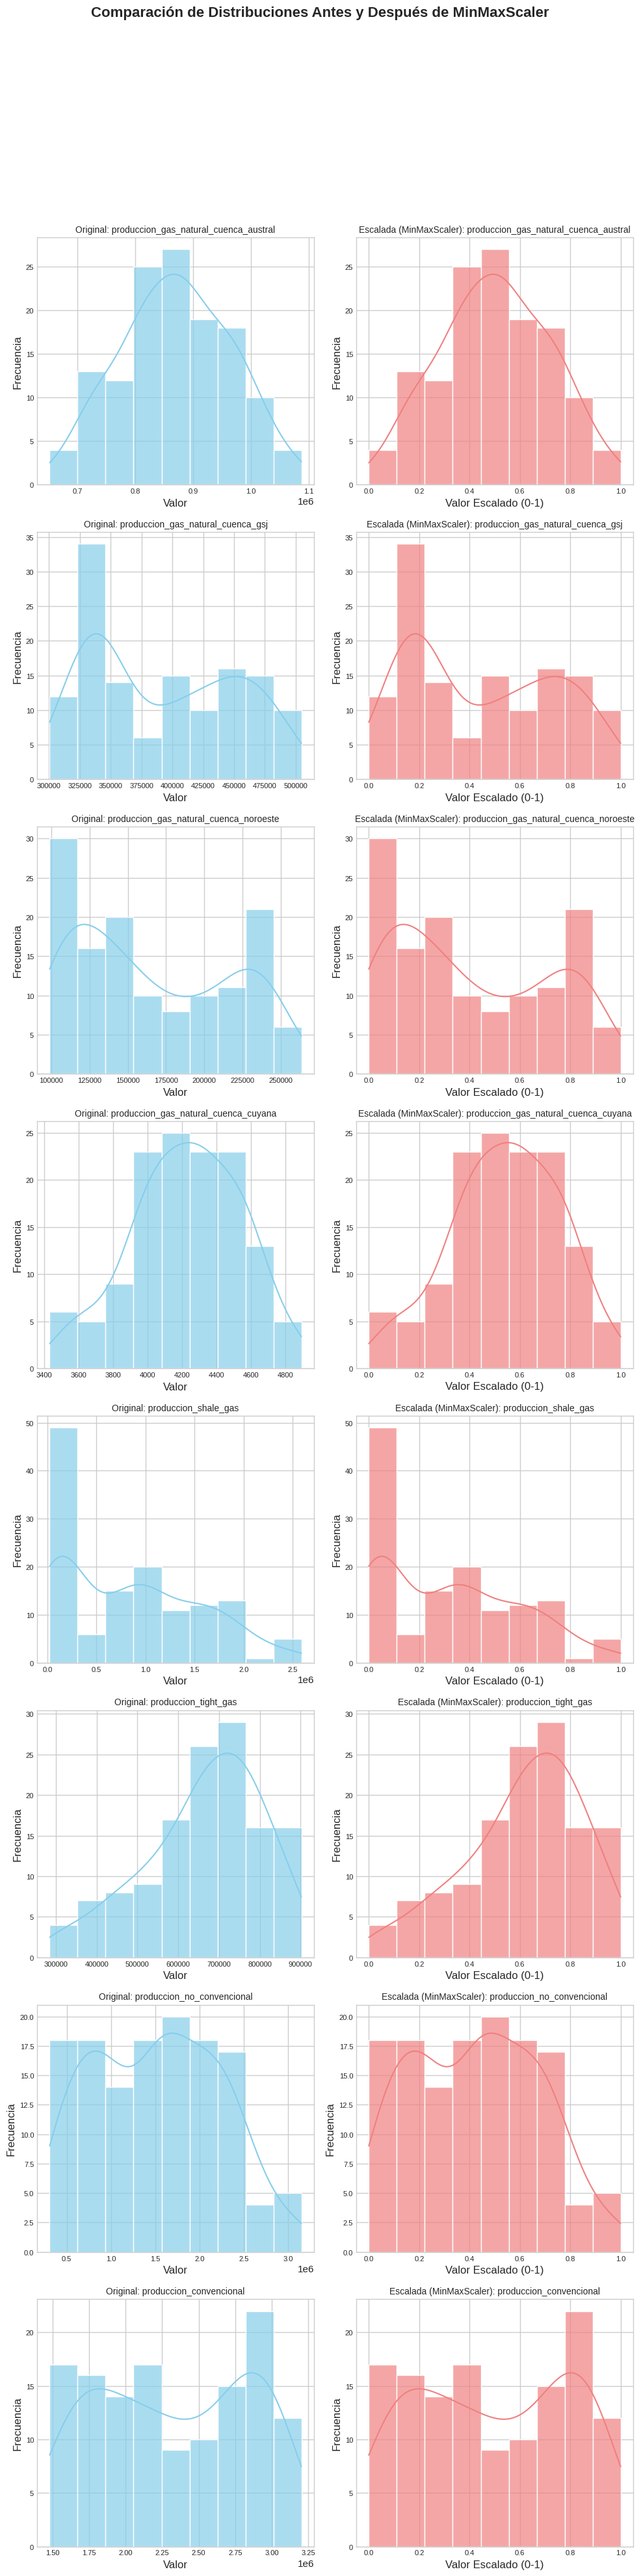

In [346]:
# Gráficos comparativos antes y despues MinMaxScaler

# Crear la figura con subplots (una columna de 2 gráficos por cada variable)
num_columnas = len(columnas_a_escalar_minmax)
fig, axes = plt.subplots(num_columnas, 2, figsize=(10, 5 * num_columnas))
fig.suptitle('Comparación de Distribuciones Antes y Después de MinMaxScaler', fontsize=16, fontweight='bold', y=1.02)

for i, columna in enumerate(columnas_a_escalar_minmax):
    # Histograma de la columna original
    sns.histplot(dataset1_10[columna], kde=True, ax=axes[i, 0], color='skyblue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {columna}', fontsize=10)
    axes[i, 0].set_xlabel('Valor')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].tick_params(axis='both', which='major', labelsize=8)

    # Histograma de la columna escalada
    sns.histplot(dataset1_10_escalado_minmax[columna], kde=True, ax=axes[i, 1], color='lightcoral', alpha=0.7)
    axes[i, 1].set_title(f'Escalada (MinMaxScaler): {columna}', fontsize=10)
    axes[i, 1].set_xlabel('Valor Escalado (0-1)')
    axes[i, 1].set_ylabel('Frecuencia')
    axes[i, 1].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Verificamos tipos de datos y guardamos dataset editado para próximos trabajos

In [44]:
dataset1_10.columns

Index(['indice_tiempo', 'produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')

In [45]:
dataset1_10.shape

(132, 13)

In [46]:
dataset1_10.dtypes

,0
indice_tiempo,datetime64[ns]
produccion_gas_natural_cuenca_austral,float64
produccion_gas_natural_cuenca_gsj,float64
produccion_gas_natural_cuenca_neuquina,float64
produccion_gas_natural_cuenca_noroeste,float64
produccion_gas_natural_cuenca_cuyana,float64
produccion_gas_natural_total,float64
produccion_shale_gas,float64
produccion_tight_gas,float64
anio,int64


Previo a la exportación del dataset1 editado se decide eliminar la feature 'indice_tiempo' ya que basaremos nuestros modelos predictivos en 'anio' y 'mes'

In [347]:
dataset1_10 = dataset1_10.drop(columns=['indice_tiempo'])
print(dataset1_10.columns)

Index(['produccion_gas_natural_cuenca_austral',
       'produccion_gas_natural_cuenca_gsj',
       'produccion_gas_natural_cuenca_neuquina',
       'produccion_gas_natural_cuenca_noroeste',
       'produccion_gas_natural_cuenca_cuyana', 'produccion_gas_natural_total',
       'produccion_shale_gas', 'produccion_tight_gas', 'anio',
       'produccion_no_convencional', 'produccion_convencional', 'mes'],
      dtype='object')


In [348]:
dataset1_10.to_csv('dataset1_editado.csv', index=False)

# **Carga e inspección Dataset2**

In [487]:
#COMENZAMOS CON EL DATASET2
#Carga del archivo Dataset2
dataset2 = pd.read_csv('produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv')



In [488]:
#Inspección Básica
dataset2.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132488,0.0,171.937,0.00,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.864960,-39.016722,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2017,1,130021,0.0,245.850,16.68,0.0,0.0,0.0,...,NEUQUINA,Neuquén,-69.733102,-39.024859,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
2,YSUR,2018,1,132487,0.0,514.696,17.00,0.0,0.0,0.0,...,NEUQUINA,Rio Negro,-67.837875,-39.019313,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2015,1,137212,0.0,422.110,0.00,0.0,0.0,0.0,...,NEUQUINA,Neuquén,-69.255971,-38.860779,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
4,YSUR,2018,1,132361,0.0,217.103,7.30,0.0,0.0,0.0,...,NEUQUINA,Neuquén,-69.231360,-38.869270,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


In [489]:
#Inspección Básica: Tamaño de dataset2
dataset2.shape

(345382, 40)

In [490]:
#Inspección Básica: Nombres columnas dataset2
dataset2.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [491]:
#Inspección Básica: Verificamos el tipo de dato
dataset2.dtypes

,0
idempresa,object
anio,int64
mes,int64
idpozo,int64
prod_pet,float64
prod_gas,float64
prod_agua,float64
iny_agua,float64
iny_gas,float64
iny_co2,float64


In [492]:
#Inspección Básica: Análisis de datos faltantes dataset 2
dataset2.isnull().sum()

,0
idempresa,0
anio,0
mes,0
idpozo,0
prod_pet,0
prod_gas,0
prod_agua,0
iny_agua,0
iny_gas,0
iny_co2,0


En esta primer fase de inspección inicial, nuestro enfoque principal consistió en determinar la cantidad de valores nulos presentes en cada columna, así como identificar los tipos de datos que contenía cada una. Este acercamiento nos brindó una visión general de la calidad y la estructura del dataset, información fundamental que guiará las etapas posteriores de *tratamiento y transformación de los datos*, donde se tomarán decisiones específicas para abordar los hallazgos iniciales.

**Análisis y Tratamiento de las Fechas**

El dataset 2 presenta diversas columnas relacionadas con fechas, incluyendo 'fechaingreso', 'fecha_data', 'mes' y 'anio', todas ellas susceptibles de ser convertidas al formato datetime.

**DECISIÓN:** Sin embargo, para enfocar nuestro análisis en la dimensión temporal de manera agregada, hemos decidido conservar únicamente las columnas 'mes' y 'anio'. A partir de estas dos columnas, crearemos una nueva columna denominada 'fecha' que contendrá la combinación del mes y el año en formato datetime. Las columnas originales 'fechaingreso' y 'fecha_data' serán eliminadas, ya que la granularidad diaria que proporcionan no es relevante para los objetivos de nuestro análisis actual, centrado en patrones temporales a nivel mensual y anual.

In [493]:
#Analisis y Tratamiento de fechas

# Crear la nueva columna 'indice_tiempo' combinando 'anio' y 'mes'
dataset2['indice_tiempo'] = pd.to_datetime({'year': dataset2['anio'],
                                     'month': dataset2['mes'],
                                     'day': 1})
# Eliminar las columnas originales que no vamos a usar
columnas_a_eliminar = ['fechaingreso', 'fecha_data']
dataset2_10 = dataset2.drop(columns=columnas_a_eliminar, errors='ignore').copy()

# Mostrar sus tipos de datos para verificar
print("\nTipos de datos de dataset2_10:")
print(dataset2_10.dtypes)



Tipos de datos de dataset2_10:
idempresa                         object
anio                               int64
mes                                int64
idpozo                             int64
prod_pet                         float64
prod_gas                         float64
prod_agua                        float64
iny_agua                         float64
iny_gas                          float64
iny_co2                          float64
iny_otro                         float64
tef                              float64
vida_util                        float64
tipoextraccion                    object
tipoestado                        object
tipopozo                          object
observaciones                     object
rectificado                       object
habilitado                        object
idusuario                          int64
empresa                           object
sigla                             object
formprod                          object
profundidad              

In [494]:
# Ordenar por fecha
dataset2 = dataset2.sort_values('indice_tiempo')

In [495]:
# Filtrar por rango de años (2006 a 2024)

dataset2_filtrado = dataset2[(dataset2['indice_tiempo'].dt.year >= 2006) &
                             (dataset2['indice_tiempo'].dt.year <= 2024)]

Al igual que en el Dataset1 se decide limitar el analisis hasta el año 2024, para así contar con los datos anuales completos y no contemplar el año en curso.

**Comparación de la serie completa vs. últimos 10 años**

A continuación, realizamos una comparación entre la serie histórica completa y los últimos 10 años de datos de producción de gas natural (Dataset 1). El objetivo es analizar si la información más reciente mantiene un comportamiento similar al histórico o si presenta tendencias distintas que justifiquen entrenar un modelo predictivo utilizando únicamente ese período más reciente, al igual que como lo realizamos en el análisis del Dataset1

In [496]:
#Filtrar últimos 10 años
dataset2_10 = dataset2_filtrado[dataset2_filtrado['indice_tiempo'] >= '2014-01-01']


In [497]:
from scipy.stats import linregress
import pandas as pd


# 1) Estadísticas descriptivas
estadisticos_dataset2 = {
    'Estadístico': ['Período', 'Promedio', 'Desviación estándar', 'Mínimo', 'Máximo'],
    'Serie completa': [
        f"{dataset2_filtrado['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset2_filtrado['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset2_filtrado['prod_gas'].mean(), 0),
        round(dataset2_filtrado['prod_gas'].std(), 0),
        round(dataset2_filtrado['prod_gas'].min(), 0),
        round(dataset2_filtrado['prod_gas'].max(), 0)
    ],
    'Últimos 10 años': [
        f"{dataset2_10['indice_tiempo'].iloc[0].strftime('%Y-%m')} a {dataset2_10['indice_tiempo'].iloc[-1].strftime('%Y-%m')}",
        round(dataset2_10['prod_gas'].mean(), 0),
        round(dataset2_10['prod_gas'].std(), 0),
        round(dataset2_10['prod_gas'].min(), 0),
        round(dataset2_10['prod_gas'].max(), 0)
    ]
}
# Creamos y mostramos la tabla
tabla_estadisticos_dataset2 = pd.DataFrame(estadisticos_dataset2)
print("Estadísticas Descriptivas (Dataset 2):")
print(tabla_estadisticos_dataset2.to_string(index=False))



Estadísticas Descriptivas (Dataset 2):
        Estadístico    Serie completa   Últimos 10 años
            Período 2006-01 a 2024-12 2014-01 a 2024-12
           Promedio             635.0             645.0
Desviación estándar            1600.0            1636.0
             Mínimo             -12.0             -12.0
             Máximo           29130.0           29130.0


Al enfocar la mirada en los últimos 10 años, desde enero de 2014 hasta diciembre de 2024, se observa una ligera variación en las estadísticas. El promedio de producción se incrementa ligeramente a 645 unidades, y la desviación estándar también experimenta un leve aumento, situándose en 1636 unidades, lo que sugiere una variabilidad similar al período completo. En general, la producción de gas muestra una tendencia a mantenerse en niveles promedio similares en ambos períodos analizados, aunque con una alta dispersión de los datos.

Tambien se observo que en ambos casos al analizar el feature de produccion de gas, es llamativo que el minimo sea un valor negativo. Tendremos en cuenta este datos para analizarlo en la *Tansformación de Datos del Dataset2* y corregirlo en caso de ser un error.

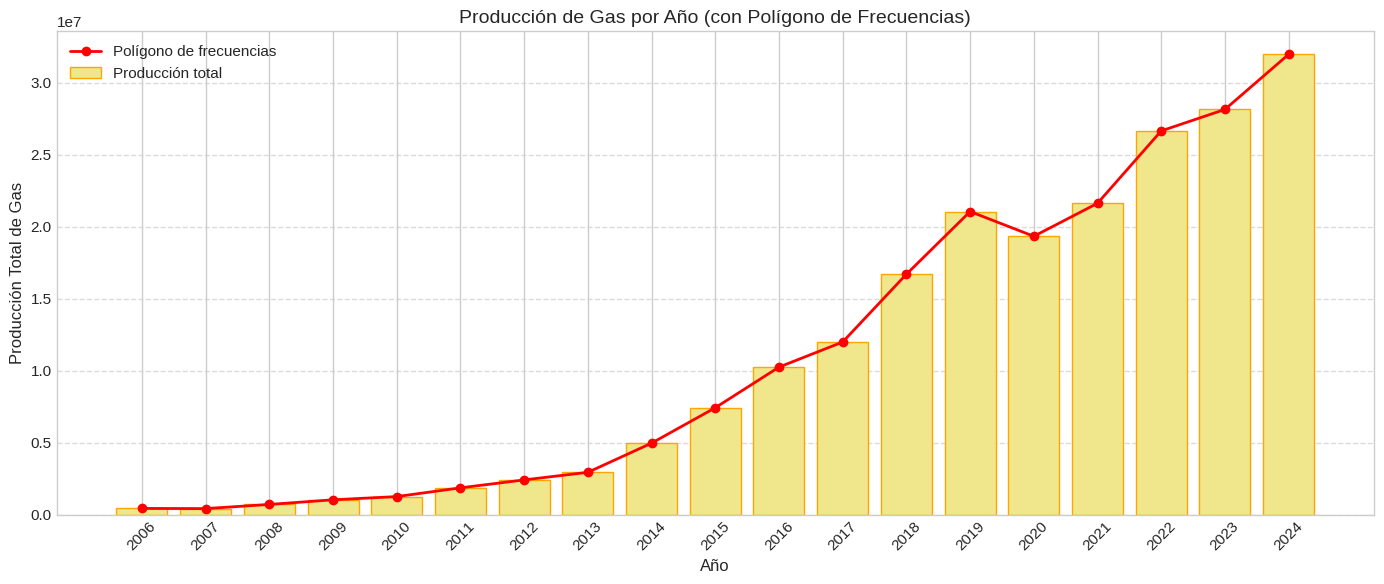

In [498]:
#Gráfico de Barras- Producción de Gas por Año (con Polígono de Frecuencias)

# Agrupar por año y calcular producción total
produccion_por_año = dataset2_filtrado.groupby('anio')['prod_gas'].sum()

#Indice tipo int
años = produccion_por_año.index.astype(int)
produccion = produccion_por_año.values

plt.figure(figsize=(14, 6))

# Barras
plt.bar(años, produccion, color='khaki', edgecolor='orange', label='Producción total')

# Línea
plt.plot(años, produccion, color='red', marker='o', linestyle='-', linewidth=2, label='Polígono de frecuencias')

# Eje X con años enteros
plt.xticks(años, rotation=45)

# Etiquetas y estilo
plt.title('Producción de Gas por Año (con Polígono de Frecuencias)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Producción Total de Gas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

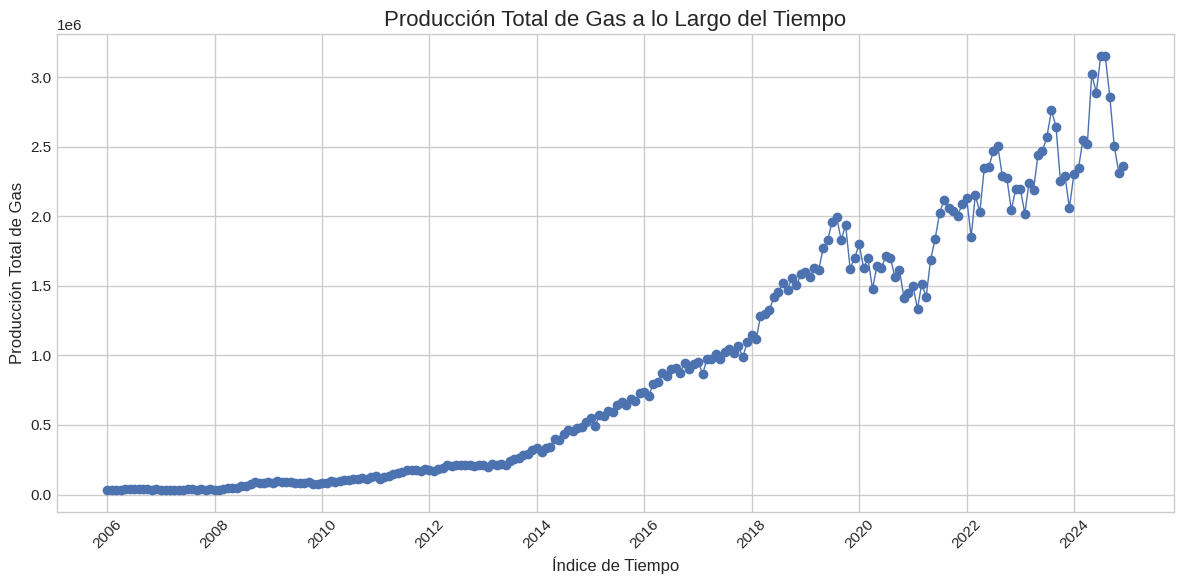

In [499]:
# Análisis de Tendencias Temporales: Producción Total a lo Largo del Tiempo

# Paso 1: Agrupar los datos por indice_tiempo y sumar la producción de gas
produccion_gas_por_fecha = dataset2_filtrado.groupby('indice_tiempo')['prod_gas'].sum().reset_index()

# Paso 2: Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Define el tamaño de la figura
plt.plot(produccion_gas_por_fecha['indice_tiempo'], produccion_gas_por_fecha['prod_gas'], marker='o', linestyle='-', linewidth=1)

# Paso 3: Añadir títulos y etiquetas
plt.title('Producción Total de Gas a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Índice de Tiempo', fontsize=12)
plt.ylabel('Producción Total de Gas', fontsize=12)
plt.grid(True)

# Paso4: Formatear el eje x para una mejor visualización de las fechas
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta los márgenes para evitar que las etiquetas se superpongan

# Paso 5: Mostrar el gráfico
plt.show()

Los gráficos anteriores (*Producción Total de Gas a lo Largo del Tiempo y Producción de Gas por Año (con Polígono de Frecuencias) )* sugiere un punto de inflexión significativo alrededor de 2014 con un fuerte aumento en la producción de gas, especialmente impulsado a partir de 2017. Posteriormente, la producción se mantiene en niveles elevados con cierta variabilidad interanual.

Este fenómeno se vincula con varios factores:

- Desarrollo de Vaca Muerta: explotación a gran escala de recursos no convencionales.

- Ley 27.007 (2014): modificó el régimen legal de hidrocarburos, generando incentivos para inversiones.

- Aumento de perforaciones y tecnologías no convencionales (shale y tight).

- Subsidios estatales a la oferta (como el Plan Gas).

- Transición energética: el gas natural gana protagonismo frente a otros combustibles.

Este contexto favoreció particularmente a la Cuenca Neuquina, principal receptora de inversiones, consolidándola como la región de mayor crecimiento.

Bibliografía: [El Gas No Convencional de Vaca Muerta como recurso estratégico para la Argentina: evolución y tendencias1](https://https://ri.conicet.gov.ar/bitstream/handle/11336/205308/CONICET_Digital_Nro.8c016886-f766-4f67-8851-b367becd8e74_B.pdf?sequence=2&isAllowed=y)

# **Visualización Dataset2**

**Producción de Gas No Convencional**

<Axes: xlabel='prod_gas', ylabel='Count'>

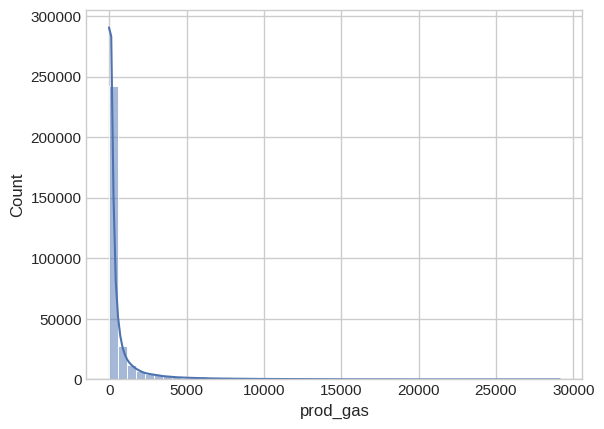

In [500]:
#Histograma- Producción de Gas Dataset2

sns.histplot(dataset2_10['prod_gas'], bins=50, kde=True)

**Producción de Gas vs. Profundidad de Pozo**

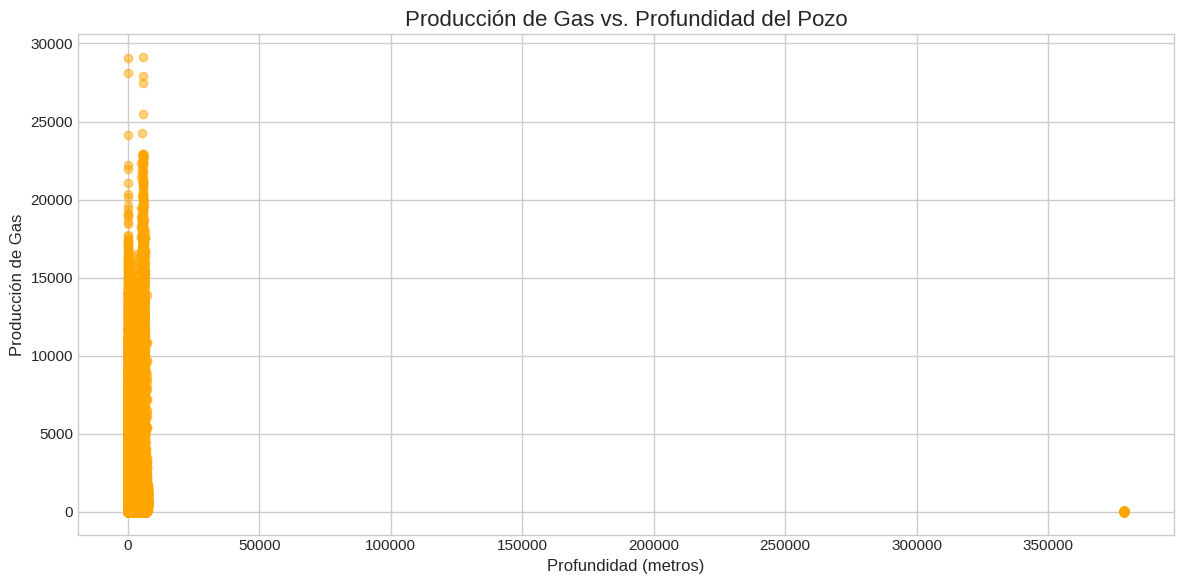

In [501]:
#Producción de Gas vs. Profundidad

if 'profundidad' in dataset2_10.columns and 'prod_gas' in dataset2_10.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(dataset2_10['profundidad'], dataset2_10['prod_gas'], alpha=0.5, color='orange')
    plt.title('Producción de Gas vs. Profundidad del Pozo', fontsize=16)
    plt.xlabel('Profundidad (metros)', fontsize=12)
    plt.ylabel('Producción de Gas', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas 'profundidad' o 'prod_gas' no están disponibles en el DataFrame.")

La mayoría de los pozos analizados se encuentran a profundidades relativamente bajas (menores a 5000 metros), y dentro de este rango, la producción de gas es muy variable. Existe un número muy pequeño de pozos que alcanzan profundidades mucho mayores, y estos pozos atípicamente profundos tienden a tener una producción de gas baja.

**Producción por Cuenca a lo Largo del Tiempo**

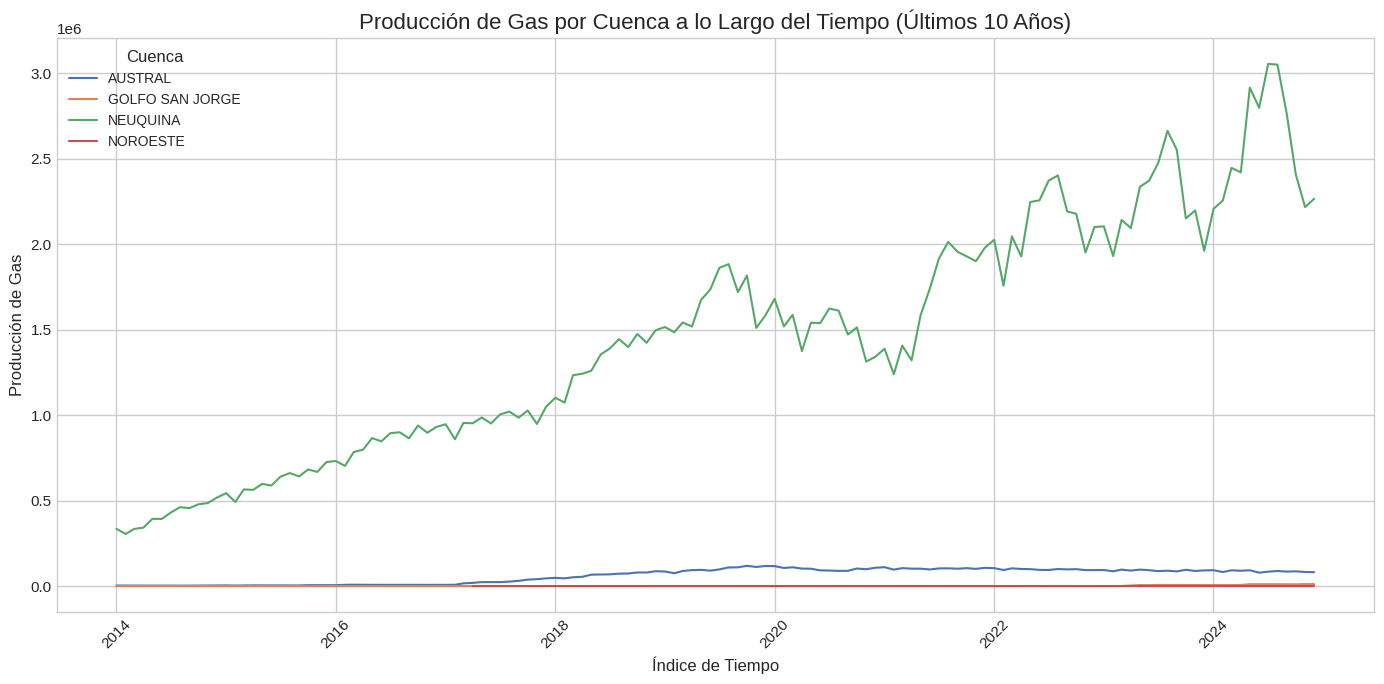

In [502]:
# Análisis de Tendencias Temporales: Producción por Cuenca a lo Largo del Tiempo

# Paso 1: Agrupar los datos por Cuenca e indice_tiempo, y sumar la producción de gas.
produccion_gas_por_cuenca_fecha = dataset2_10.groupby(['cuenca', 'indice_tiempo'])['prod_gas'].sum().reset_index()

# Paso 2: Obtener la lista única de cuencas para iterar sobre ellas.
cuencas_unicas = produccion_gas_por_cuenca_fecha['cuenca'].unique()

# Paso 3: Crear la figura y los ejes para el gráfico.
plt.figure(figsize=(14, 7))
plt.grid(True)

# Paso 4: Iterar sobre cada cuenca y graficar su producción a lo largo del tiempo.
for cuenca in cuencas_unicas:
    data_cuenca = produccion_gas_por_cuenca_fecha[produccion_gas_por_cuenca_fecha['cuenca'] == cuenca]
    plt.plot(data_cuenca['indice_tiempo'], data_cuenca['prod_gas'], label=cuenca, linewidth=1.5)

# Paso 5: Añadir títulos, etiquetas y leyenda.
plt.title('Producción de Gas por Cuenca a lo Largo del Tiempo (Últimos 10 Años)', fontsize=16)
plt.xlabel('Índice de Tiempo', fontsize=12)
plt.ylabel('Producción de Gas', fontsize=12)
plt.legend(title='Cuenca', fontsize=10)

# Paso 6: Formatear el eje x para una mejor visualización de las fechas.
plt.xticks(rotation=45)
plt.tight_layout()

# Paso 7: Mostrar el gráfico.
plt.show()

La Cuenca Neuquina se destaca como la dominante en la producción de gas, experimentando un crecimiento exponencial a partir de 2014. Las otras tres cuencas (Austral, Golfo San Jorge y Noroeste) mantienen niveles de producción de gas significativamente más bajos y relativamente estables a lo largo del período analizado. El aumento masivo en la producción total de gas que vimos en el gráfico anterior se debe principalmente al crecimiento en la Cuenca Neuquina.

Este gráfico resalta la disparidad en la producción de gas entre las diferentes cuencas, con la Cuenca Neuquina emergiendo como la fuerza impulsora del aumento en la producción total.

**Producción de Gas No Convencional por Subtipo de Recurso**


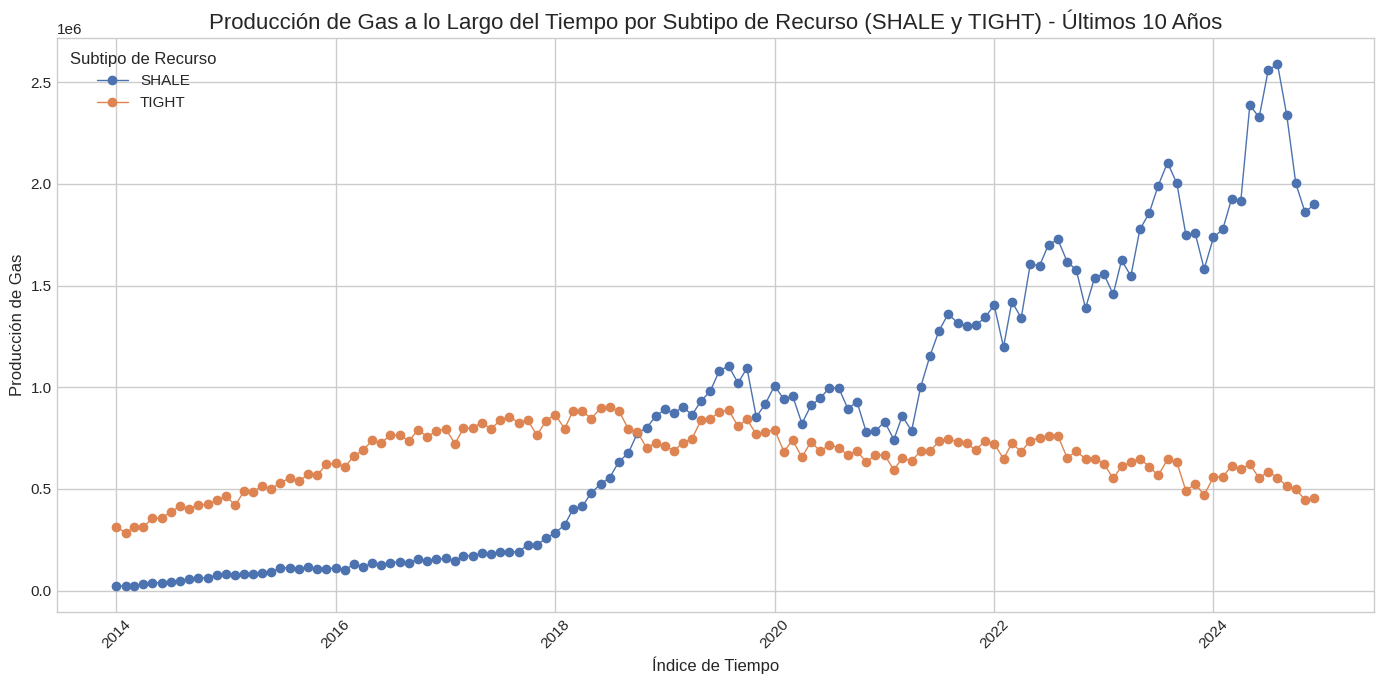

In [503]:
# Análisis de Datos Categóricos: Producción por Subtipo de Recurso

# Paso 1: Filtrar el DataFrame para incluir solo los subtipos 'SHALE' y 'TIGHT'.
df_shale_tight = dataset2_10[dataset2_10['sub_tipo_recurso'].isin(['SHALE', 'TIGHT'])].copy()

# Paso 2: Convertir la columna 'indice_tiempo' a datetime si aún no lo está.
if not pd.api.types.is_datetime64_any_dtype(df_shale_tight['indice_tiempo']):
    df_shale_tight['indice_tiempo'] = pd.to_datetime(df_shale_tight['indice_tiempo'])

# Paso 3: Agrupar por indice_tiempo y subtipo de recurso, y sumar la producción de gas.
produccion_tiempo_subtipo = df_shale_tight.groupby(['indice_tiempo', 'sub_tipo_recurso'])['prod_gas'].sum().reset_index()

# Paso 4: Pivotear la tabla para tener 'SHALE' y 'TIGHT' como columnas.
produccion_pivot = produccion_tiempo_subtipo.pivot(index='indice_tiempo', columns='sub_tipo_recurso', values='prod_gas').fillna(0)

# Paso 6: Crear el gráfico de líneas.
plt.figure(figsize=(14, 7))
plt.plot(produccion_pivot.index, produccion_pivot['SHALE'], label='SHALE', marker='o', linestyle='-', linewidth=1)
plt.plot(produccion_pivot.index, produccion_pivot['TIGHT'], label='TIGHT', marker='o', linestyle='-', linewidth=1)

# Paso 5: Añadir título y etiquetas.
plt.title('Producción de Gas a lo Largo del Tiempo por Subtipo de Recurso (SHALE y TIGHT) - Últimos 10 Años', fontsize=16)
plt.xlabel('Índice de Tiempo', fontsize=12)
plt.ylabel('Producción de Gas', fontsize=12)
plt.legend(title='Subtipo de Recurso')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Paso 6: Mostrar el gráfico.
plt.show()

**Cantidad de Pozos de Gas No Convencional por Subtipo de Recurso**

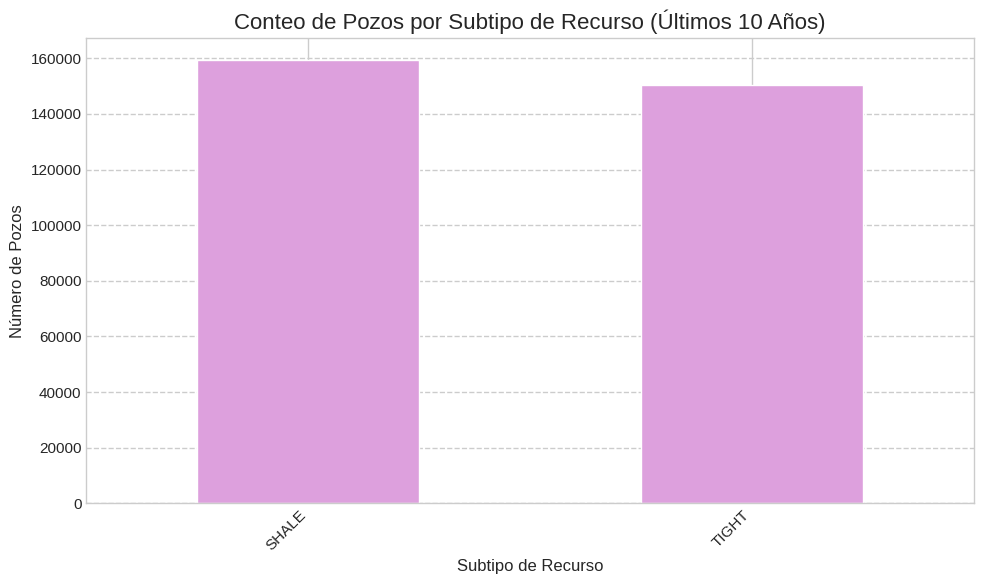

In [504]:
# Análisis de Datos Categóricos: Conteo de Pozos por Subtipo de Recurso

# Paso 1: Asegurarse de que la columna 'sub_tipo_recurso' exista en el DataFrame dataset2_10.
if 'sub_tipo_recurso' not in dataset2_10.columns:
    print("La columna 'sub_tipo_recurso' no se encuentra en dataset2_10.")
    exit()

# Paso 2: Contar la frecuencia de cada subtipo de recurso.
conteo_subtipo = dataset2_10['sub_tipo_recurso'].value_counts()

# Paso 3: Crear el gráfico de barras.
plt.figure(figsize=(10, 6))
conteo_subtipo.plot(kind='bar', color='plum')

# Paso 4: Añadir título y etiquetas.
plt.title('Conteo de Pozos por Subtipo de Recurso (Últimos 10 Años)', fontsize=16)
plt.xlabel('Subtipo de Recurso', fontsize=12)
plt.ylabel('Número de Pozos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Paso 5: Ajustar el layout para evitar que las etiquetas se superpongan.
plt.tight_layout()

# Paso 6: Mostrar el gráfico.
plt.show()

El análisis de los últimos 10 años de producción de gas, muestra la producción a lo largo del tiempo para ambos subtipos(SHALE y TIGHT), permitiendo observar tendencias y posibles correlaciones o divergencias en su comportamiento productivo.

Por otro lado, el gráfico de barras del conteo de pozos por subtipo de recurso ofrece una visión que indica la paridad en cuanto a la cantidad de pozos dedicados a la extracción de gas de formaciones SHALE y TIGHT.

Sin embargo A pesar de existir una cantidad similar de pozos operativos para la extracción de gas de formaciones SHALE y TIGHT en los últimos 10 años, la producción proveniente de los pozos SHALE ha sido considerablemente mayor. Esto implica una **mayor productividad promedio por pozo para el subtipo SHALE** en comparación con el TIGHT. Esta disparidad en la producción, a pesar de una inversión similar en la cantidad de pozos, subraya la importancia de considerar el tipo de recurso al evaluar la eficiencia y el potencial productivo. Para futuras estrategias y predicciones, es crucial tener en cuenta esta diferencia en la productividad inherente entre los pozos SHALE y TIGHT.

**Outliers - Producción de Gas y Profundidad**

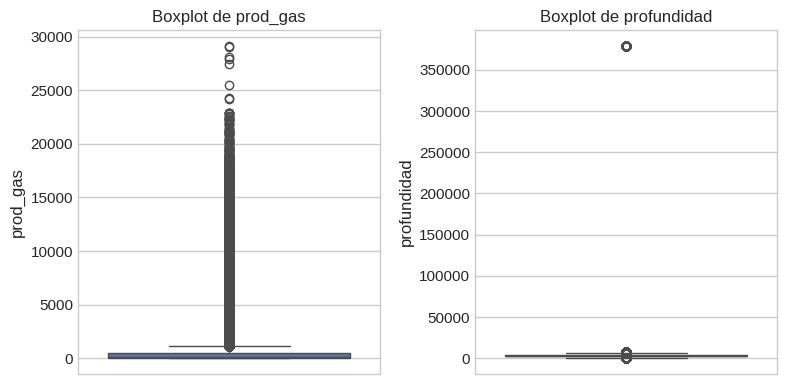

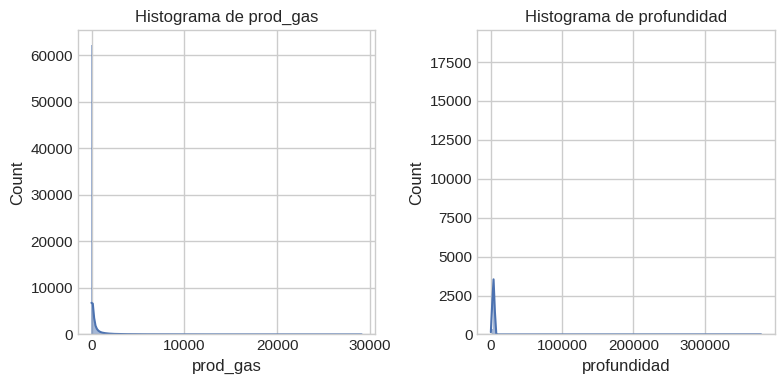

            prod_gas    profundidad
count  310183.000000  310183.000000
mean      644.811274    3678.058666
std      1635.936657    6958.068223
min       -12.267000       0.000000
25%        10.633258    2850.000000
50%       110.610000    3214.000000
75%       471.854050    4360.000000
max     29129.660000  378939.000000

Outliers en la columna 'prod_gas':
        prod_gas
260560   5939.99
338902   1337.12
260562   6952.57
338904   2312.54
260578   1846.64
Número de outliers: 40360

Outliers en la columna 'profundidad':
       profundidad
17596        350.0
39771        350.0
41660        350.0
58744        350.0
81527        350.0
Número de outliers: 5820


In [505]:
variables_a_explorar = ['prod_gas', 'profundidad']

# 1. Exploración de Outliers:

# Boxplots
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables_a_explorar):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=dataset2_10[variable])
    plt.title(f'Boxplot de {variable}')
plt.tight_layout()
plt.show()

# Histogramas
plt.figure(figsize=(12, 4))
for i, variable in enumerate(variables_a_explorar):
    plt.subplot(1, 3, i + 1)
    sns.histplot(dataset2_10[variable], kde=True)
    plt.title(f'Histograma de {variable}')
plt.tight_layout()
plt.show()

# Estadísticas Descriptivas
print(dataset2_10[variables_a_explorar].describe())

# Identificación de outliers usando IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

for variable in variables_a_explorar:
    outliers_variable = detectar_outliers_iqr(dataset2_10, variable)
    print(f"\nOutliers en la columna '{variable}':")
    print(outliers_variable[[variable]].head())
    print(f"Número de outliers: {len(outliers_variable)}")


En resumen, los boxplots revelan distribuciones no normales con sesgo positivo y la presencia de outliers significativos en 'prod_gas' y 'profundidad'.

# **Transformación de Datos del Dataset2**

In [506]:
#Columnas con datos faltantes dataset2
dataset2_10.isnull().sum().loc[lambda x: x > 0]

,0
vida_util,304758
tipoextraccion,236
tipoestado,236
tipopozo,236
observaciones,293877
clasificacion,528
subclasificacion,528
sub_tipo_recurso,338


**Valores Nulos**

Se identificaron variables con:

**a. Altos valores nulos (más del 90%)**

- vida_util
- observaciones

DECISIÓN: Descartamos las features de 'vida_util' y 'observaciones' y por su baja utilidad y gran cantidad de nulos.


In [507]:
# Eliminar 'vida_util' y 'observaciones'

columnas_a_eliminar = ['vida_util', 'observaciones']

# Verificar si las columnas existen antes de intentar eliminarlas
for col in columnas_a_eliminar:
    if col in dataset2_10.columns:
        print(f"La columna '{col}' será eliminada.")
    else:
        print(f"La columna '{col}' no se encontró en el DataFrame.")

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Mostrar las primeras filas del DataFrame resultante para verificar
print("\nDataFrame dataset2_10 actualizado sin 'vida_util' y 'observaciones'.")
print(dataset2_10.head(2))

# Volver a imprimir las columnas para confirmar la eliminación
print("\nColumnas restantes en dataset2_10:")
print(dataset2_10.columns)

La columna 'vida_util' será eliminada.
La columna 'observaciones' será eliminada.

DataFrame dataset2_10 actualizado sin 'vida_util' y 'observaciones'.
       idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
17712        YPF  2014    1  145547       0.0    644.96       34.7       0.0   
338900      APEA  2014    1  132877       0.0      0.00        0.0       0.0   

        iny_gas  iny_co2  ...  provincia  coordenadax coordenaday  \
17712       0.0      0.0  ...    Neuquén   -68.884200  -38.746600   
338900      0.0      0.0  ...  Rio Negro   -67.823092  -39.023537   

        tipo_de_recurso      proyecto clasificacion subclasificacion  \
17712   NO CONVENCIONAL      GAS PLUS   EXPLOTACION       DESARROLLO   
338900  NO CONVENCIONAL  Sin Proyecto   EXPLOTACION       DESARROLLO   

       sub_tipo_recurso  fecha_data indice_tiempo  
17712             TIGHT  2014-01-31    2014-01-01  
338900            TIGHT  2014-01-31    2014-01-01  

[2 rows x 39 columns]

Co

**b. Valores nulos moderados (500–1,000)**
- clasificacion
- subclasificacion
- tipoextraccion
- tipopozo
- tipoestado
- sub_tipo_recurso


In [508]:
#Valores Nulos- Clasificación
columna_clasificacion = 'clasificacion'

# Obtener todos los valores únicos de la columna 'clasificacion'
valores_unicos = dataset2[columna_clasificacion].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_clasificacion}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'clasificacion':
EXPLOTACION
EXPLORACION
nan
SERVICIO


In [509]:
#Valores Nulos- Subclasificación
columna_subclasificacion = 'subclasificacion'

# Obtener todos los valores únicos de la columna 'subclasificacion'
valores_unicos = dataset2[columna_subclasificacion].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_subclasificacion}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'subclasificacion':
DESARROLLO
EXPLORACION
EXPLORATORIO PROFUNDO
EXTENSION
AVANZADA
nan
ESTUDIO
CONTROL
SUMIDERO


In [510]:
#Valores Nulos- Tipoextraccion
columna_tipoextraccion = 'tipoextraccion'

# Obtener todos los valores únicos de la columna 'tipoextraccion'
valores_unicos = dataset2[columna_tipoextraccion].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_tipoextraccion}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'tipoextraccion':
Sin Sistema de Extracción
Bombeo Hidráulico
Bombeo Mecánico
Surgencia Natural
nan
Plunger Lift
Gas Lift
Electrosumergible
Otros Tipos de Extracción
Pistoneo (Swabbing)
Jet Pump
Cavidad Progresiva


**DECISIÓN:** Eliminar las variables 'clasificacion', 'subclasificacion' y 'tipoextracion' ya que no son relevantes para nuestro analisis. Nuestro analisis se enfoca en la producción activa y no vamos a realizar clusters tan precisos como lo seria pozo por pozo.

In [511]:
#Eliminar  'clasificacion', 'subclasificacion' y 'tipoextracion'

columnas_a_eliminar = ['clasificacion', 'subclasificacion', 'tipoextraccion']

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10_sin_clasif_sub_tipo = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Reemplazar el Dataset2_10
dataset2_10 = dataset2_10_sin_clasif_sub_tipo
print("\nDataFrame dataset2_10 actualizado sin las columnas especificadas.")
print(dataset2_10.head(2))


DataFrame dataset2_10 actualizado sin las columnas especificadas.
       idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
17712        YPF  2014    1  145547       0.0    644.96       34.7       0.0   
338900      APEA  2014    1  132877       0.0      0.00        0.0       0.0   

        iny_gas  iny_co2  ...          areayacimiento    cuenca  provincia  \
17712       0.0      0.0  ...           CUPEN MAHUIDA  NEUQUINA    Neuquén   
338900      0.0      0.0  ...  ESTACION FERNANDEZ ORO  NEUQUINA  Rio Negro   

       coordenadax coordenaday  tipo_de_recurso      proyecto  \
17712   -68.884200  -38.746600  NO CONVENCIONAL      GAS PLUS   
338900  -67.823092  -39.023537  NO CONVENCIONAL  Sin Proyecto   

        sub_tipo_recurso  fecha_data indice_tiempo  
17712              TIGHT  2014-01-31    2014-01-01  
338900             TIGHT  2014-01-31    2014-01-01  

[2 rows x 36 columns]


**DECISIÓN:**  Mantener las categorías: 'tipopozo', 'tipoestado' y 'sub_tipo_recurso'. Pero Imputar con "Sin datos" si son categóricas para en un futuro analizar si estas variables tiene alguna particularidad para agruparlas.

In [512]:
#Valores Nulos- Tipopozo
columna_tipopozo = 'tipopozo'

# Obtener todos los valores únicos de la columna 'tipopozo'
valores_unicos = dataset2[columna_tipopozo].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_tipopozo}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'tipopozo':
Otro tipo
Petrolífero
Gasífero
nan
Inyección de Agua
Sumidero
Inyección de Gas


**DECISION:** Mantener solo los datos donde en mi feature 'tipopozo' solo conserve el valor 'Gasífero'. Esto se debe a que el Dataset2 tiene información sobre Gas y Petroleo no convencional, pero solo conservamos los gasiferos que son pertinentes para nuestro análisis.

In [513]:
#Valores Nulos- Tipoestado
columna_tipoestado = 'tipoestado'

# Obtener todos los valores únicos de la columna 'tipoestado'
valores_unicos = dataset2[columna_tipoestado].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_tipoestado}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'tipoestado':
En Estudio
Abandonado
Parado Transitoriamente
Extracción Efectiva
nan
A Abandonar
En Reserva de Gas
Otras Situación Inactivo
Mantenimiento de Presión
En Espera de Reparación
En Reparación
En Reserva para Recup. Sec./Asist.
Otras Situación Activo
Parado Alta Relación Agua/Petróleo
En Inyección Efectiva
Parado Alta Relación Gas/Petróleo
Abandono Temporario


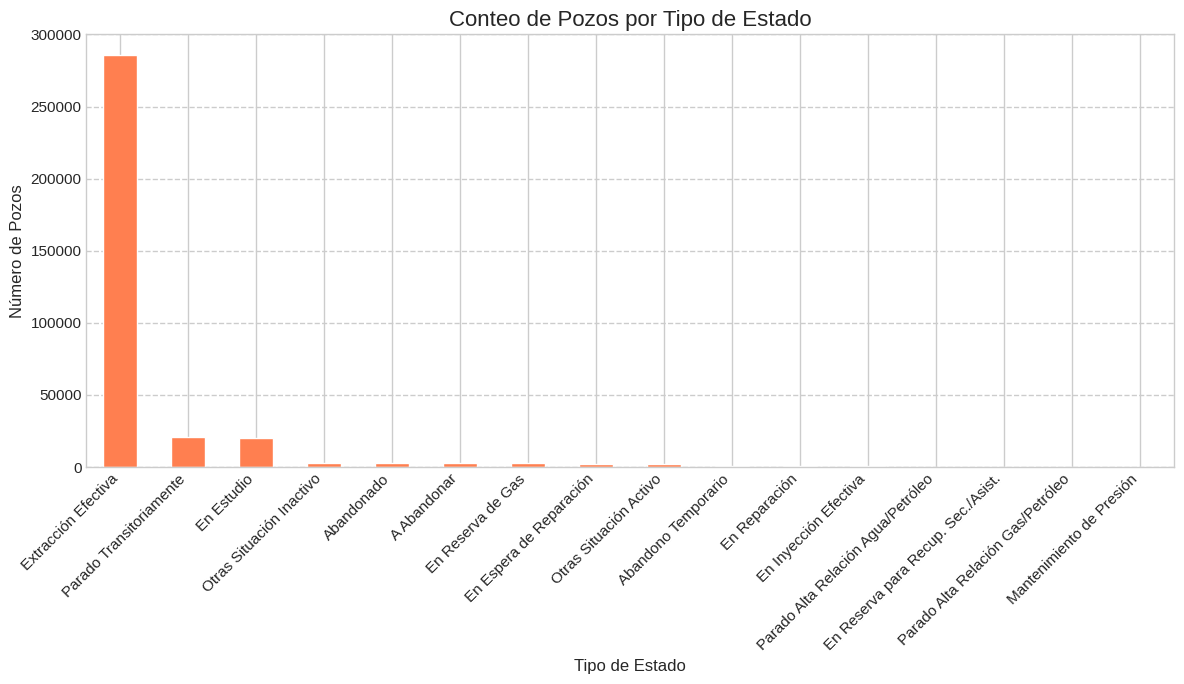

In [514]:
#Análisis de Datos Categóricos: Conteo de Pozos por Tipo de Estado

if 'tipoestado' not in dataset2.columns:
    print("La columna 'tipoestado' no se encuentra en dataset2.")
    exit()

# Paso 2: Contar la frecuencia de cada tipo de estado.
conteo_tipoestado = dataset2['tipoestado'].value_counts()

# Paso 3: Crear el gráfico de barras.
plt.figure(figsize=(12, 7))
conteo_tipoestado.plot(kind='bar', color='coral')

# Paso 4: Añadir título y etiquetas.
plt.title('Conteo de Pozos por Tipo de Estado', fontsize=16)
plt.xlabel('Tipo de Estado', fontsize=12)
plt.ylabel('Número de Pozos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Paso 5: Ajustar el layout para evitar que las etiquetas se superpongan.
plt.tight_layout()

# Paso 6: Mostrar el gráfico.
plt.show()

El gráfico de distribución del tipo de estado de los pozos revela que la mayor proporción de pozos se encuentra actualmente en estado de "Extracción Efectiva", lo que indica que son los pozos con actividad productiva predominante dentro del dataset.

**DECISIÓN:**Para nuestro análisis, con el objetivo de construir un modelo de predicción futura de la producción, las categorías más relevantes son aquellas que representan pozos con actividad presente. Estas corresponden principalmente a "Extracción Efectiva" y "Otras Situación Activo", ya que reflejan pozos que están operativos o en alguna otra condición de actividad. Por esta razón, se ha decidido enfocar el análisis y el modelado predictivo en estas dos categorías, descartando aquellos pozos que se encuentran en estados inactivos o finalizados, ya que su comportamiento pasado no sería indicativo de la producción futura de los pozos activos.

In [515]:
#Valores Nulos- Sub_tipo_recurso
columna_sub_tipo_recurso = 'sub_tipo_recurso'

# Obtener todos los valores únicos de la columna 'sub_tipo_recurso'
valores_unicos = dataset2[columna_sub_tipo_recurso].unique()

# Imprimir los valores únicos
print(f"Valores únicos en la columna '{columna_sub_tipo_recurso}':")
for valor in valores_unicos:
    print(valor)

Valores únicos en la columna 'sub_tipo_recurso':
SHALE
TIGHT
nan


In [516]:
# Definir los criterios de filtrado y el valor de imputación
columna_tipoestado = 'tipoestado'
estados_a_conservar = ['Extracción Efectiva', 'Otras Situación Activo']
columna_tipopozo = 'tipopozo'
valor_a_conservar_tipopozo = 'Gasífero'
columna_sub_tipo_recurso = 'sub_tipo_recurso'
valor_a_imputar_sub_tipo = 'Sin Datos'

# 1. Filtrar por 'tipoestado' y 'tipopozo' en dataset2_10
dataset2_10 = dataset2_10[(dataset2_10[columna_tipoestado].isin(estados_a_conservar)) &
                                  (dataset2_10[columna_tipopozo] == valor_a_conservar_tipopozo)].copy()


# 2. Imputar valores NaN en la columna 'sub_tipo_recurso' en dataset2_10
dataset2_10[columna_sub_tipo_recurso] = dataset2_10[columna_sub_tipo_recurso].fillna(valor_a_imputar_sub_tipo)


# Imprimir el resultado con el formato solicitado (pero adaptado al filtrado realizado)
print("\nResultados después del filtrado e imputación:")
print(f"Valores únicos en la columna '{columna_tipopozo}':")
print(dataset2_10[columna_tipopozo].unique())
print(f"Cantidad de valores nulos en la columna '{columna_tipopozo}': {dataset2_10[columna_tipopozo].isnull().sum()}")
print("-" * 30)
print(f"Valores únicos en la columna '{columna_tipoestado}':")
print(dataset2_10[columna_tipoestado].unique())
print(f"Cantidad de valores nulos en la columna '{columna_tipoestado}': {dataset2_10[columna_tipoestado].isnull().sum()}")
print("-" * 30)
print(f"Valores únicos en la columna '{columna_sub_tipo_recurso}':")
print(dataset2_10[columna_sub_tipo_recurso].unique())
print(f"Cantidad de valores nulos en la columna '{columna_sub_tipo_recurso}': {dataset2_10[columna_sub_tipo_recurso].isnull().sum()}")
print("-" * 30)



Resultados después del filtrado e imputación:
Valores únicos en la columna 'tipopozo':
['Gasífero']
Cantidad de valores nulos en la columna 'tipopozo': 0
------------------------------
Valores únicos en la columna 'tipoestado':
['Extracción Efectiva' 'Otras Situación Activo']
Cantidad de valores nulos en la columna 'tipoestado': 0
------------------------------
Valores únicos en la columna 'sub_tipo_recurso':
['TIGHT' 'SHALE' 'Sin Datos']
Cantidad de valores nulos en la columna 'sub_tipo_recurso': 0
------------------------------


c. Sin nulos

Todas las demás columnas que están completas no requieren tratamiento.

In [517]:
#Columnas con datos de tipo object dataset2

#Creamos un resumen con tipo de dato y cantidad de nulos
resumen = pd.DataFrame({
    'Tipo de Dato': dataset2_10.dtypes,
    'Valores Nulos': dataset2_10.isnull().sum()
})

pd.DataFrame({
    'Tipo de Dato': dataset2_10.dtypes,
    'Valores Nulos': dataset2_10.isnull().sum(),
    'Porcentaje de Nulos (%)': (dataset2_10.isnull().mean() * 100).round(2)
})

# Filtramos solo las columnas de tipo object
resumen_object = resumen[resumen['Tipo de Dato'] == 'object']

print(resumen_object)

                       Tipo de Dato  Valores Nulos
idempresa                    object              0
tipoestado                   object              0
tipopozo                     object              0
fechaingreso                 object              0
rectificado                  object              0
habilitado                   object              0
empresa                      object              0
sigla                        object              0
formprod                     object              0
formacion                    object              0
idareapermisoconcesion       object              0
areapermisoconcesion         object              0
idareayacimiento             object              0
areayacimiento               object              0
cuenca                       object              0
provincia                    object              0
tipo_de_recurso              object              0
proyecto                     object              0
sub_tipo_recurso             ob

In [518]:
#Eliminar fecha_data y fechaingreso

columnas_a_eliminar = ['fecha_data', 'fechaingreso']

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Imprimir solo el listado de columnas actualizado
print(dataset2_10.columns.tolist())

['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas', 'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef', 'tipoestado', 'tipopozo', 'rectificado', 'habilitado', 'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion', 'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento', 'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday', 'tipo_de_recurso', 'proyecto', 'sub_tipo_recurso', 'indice_tiempo']


**Tratamiento de datos de tipo objeto**

In [519]:
#Columnas con tipo objeto

# Seleccionar solo las columnas de tipo 'object'
object_columns = dataset2_10.select_dtypes(include=['object']).columns.tolist()

# O, si también quieres ver el tipo de dato y la cantidad de nulos para estas columnas:
resumen_object_10 = pd.DataFrame({
    'Tipo de Dato': dataset2_10[object_columns].dtypes,
    'Valores Nulos': dataset2_10[object_columns].isnull().sum()
})

print("\nResumen de columnas de tipo 'object' en dataset2_10:")
print(resumen_object_10)


Resumen de columnas de tipo 'object' en dataset2_10:
                       Tipo de Dato  Valores Nulos
idempresa                    object              0
tipoestado                   object              0
tipopozo                     object              0
rectificado                  object              0
habilitado                   object              0
empresa                      object              0
sigla                        object              0
formprod                     object              0
formacion                    object              0
idareapermisoconcesion       object              0
areapermisoconcesion         object              0
idareayacimiento             object              0
areayacimiento               object              0
cuenca                       object              0
provincia                    object              0
tipo_de_recurso              object              0
proyecto                     object              0
sub_tipo_recurso            

In [520]:
#Eliminar columnas que no son necesarias

columnas_a_eliminar = [
    'rectificado',
    'habilitado',
    'formprod',
    'formacion',
    'idareapermisoconcesion',
    'areapermisoconcesion',
    'idareayacimiento',
    'areayacimiento',
    'proyecto',
    'idempresa',
    'empresa',
    'sigla',
    'idusuario',
    'tipo_de_recurso',
    'prod_pet',
    'prod_agua',
    'iny_otro'
]

# Crear un nuevo DataFrame sin las columnas especificadas
dataset2_10 = dataset2_10.drop(columns=columnas_a_eliminar, errors='ignore')

# Volver a imprimir las columnas para confirmar la eliminación (opcional)
# Seleccionar solo las columnas de tipo 'object'
object_df = dataset2_10.select_dtypes(include=['object'])

# Crear el DataFrame resumen
resumen_object_10 = pd.DataFrame({
    'Tipo de Dato': object_df.dtypes,
    'Valores Nulos': object_df.isnull().sum()
})
print(resumen_object_10)

                 Tipo de Dato  Valores Nulos
tipoestado             object              0
tipopozo               object              0
cuenca                 object              0
provincia              object              0
sub_tipo_recurso       object              0


**DECISIÓN:** Eliminar las columnas 'rectificado','habilitado','formprod', 'formacion','idareapermisoconcesion','areapermisoconcesion', 'idareayacimiento', 'areayacimiento' 'proyecto', 'idempresa','empresa', 'sigla', 'idpozo', 'idusuario', 'tipo_de_recurso'. Esto debido a que no es relevante para el analisis de la produccion de los últimos 10 años, ni para la produccción futura.

In [521]:
#Convertir features de object a category

columnas_a_convertir = [
    'tipoestado',
    'tipopozo',
    'cuenca',
    'provincia',
    'tipo_de_recurso',
    'sub_tipo_recurso'
]

for col in columnas_a_convertir:
    if col in dataset2_10.columns:
        dataset2_10[col] = dataset2_10[col].astype('category')

# Verificar los tipos de datos después de la conversión
print(dataset2_10.dtypes)

anio                         int64
mes                          int64
idpozo                       int64
prod_gas                   float64
iny_agua                   float64
iny_gas                    float64
iny_co2                    float64
tef                        float64
tipoestado                category
tipopozo                  category
profundidad                float64
cuenca                    category
provincia                 category
coordenadax                float64
coordenaday                float64
sub_tipo_recurso          category
indice_tiempo       datetime64[ns]
dtype: object


**Tratamiento de Outliers**

In [522]:
# Filtrar las filas donde 'prod_gas' es menor que 0
valores_negativos_prod_gas = dataset2_10[dataset2_10['prod_gas'] < 0]

# Mostrar todas las filas con valores negativos en 'prod_gas'
print("Filas con valores negativos en 'prod_gas':")
print(valores_negativos_prod_gas)

# Si solo quieres ver la cantidad de valores negativos
cantidad_negativos_prod_gas = len(valores_negativos_prod_gas)
print(f"\nCantidad de valores negativos en 'prod_gas': {cantidad_negativos_prod_gas}")

Filas con valores negativos en 'prod_gas':
        anio  mes  idpozo  prod_gas  iny_agua  iny_gas  iny_co2   tef  \
246904  2020    5  153228   -12.267       0.0      0.0      0.0  6.13   
246944  2020    5  153227    -7.519       0.0      0.0      0.0  6.13   

                 tipoestado  tipopozo  profundidad    cuenca provincia  \
246904  Extracción Efectiva  Gasífero       3419.0  NEUQUINA   Neuquén   
246944  Extracción Efectiva  Gasífero       3419.0  NEUQUINA   Neuquén   

        coordenadax  coordenaday sub_tipo_recurso indice_tiempo  
246904   -68.179297   -38.920979            TIGHT    2020-05-01  
246944   -68.179297   -38.920979            TIGHT    2020-05-01  

Cantidad de valores negativos en 'prod_gas': 2


In [523]:
# Identificar los índices de las filas con valores negativos en 'prod_gas'
indices_a_eliminar = dataset2_10[dataset2_10['prod_gas'] < 0].index

# Eliminar las filas utilizando los índices identificados
dataset2_10 = dataset2_10.drop(indices_a_eliminar)

# Resetear el índice del DataFrame después de la eliminación (opcional)
dataset2_10 = dataset2_10.reset_index(drop=True)

# Verificar los valores mínimos de 'prod_gas' después de la eliminación
print(f"Valor mínimo de 'prod_gas' después de eliminar negativos: {dataset2_10['prod_gas'].min()}")

Valor mínimo de 'prod_gas' después de eliminar negativos: 0.0


**DECISIÓN:** Se eliminaron los dos registros con valores negativos en 'prod_gas' debido a la alta probabilidad de ser lecturas erróneas. La coincidencia en el resto de las columnas (año, mes, coordenadas, profundidad, etc.) sugiere que no son representativos del total, y la imputación con cero podría interpretarse incorrectamente como una falta de producción en esas fechas.

La columna 'prod_gas' ha sido transformada logarítmicamente y guardada como 'prod_gas_log'.


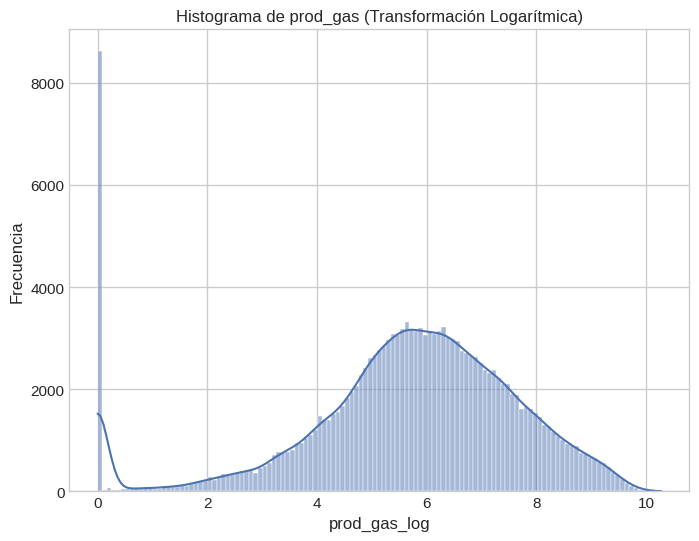

In [524]:
#Transformación Logaritmica de Outliers en Producción de Gas

# Verificar si la columna 'prod_gas' existe
if 'prod_gas' in dataset2_10.columns:
    # Verificar si todos los valores en 'prod_gas' son no negativos
    if (dataset2_10['prod_gas'] >= 0).all():
        # Aplicar la transformación logarítmica (sumando 1 para manejar los ceros)
        dataset2_10['prod_gas_log'] = np.log1p(dataset2_10['prod_gas'])
        print("La columna 'prod_gas' ha sido transformada logarítmicamente y guardada como 'prod_gas_log'.")
    else:
        print("La columna 'prod_gas' contiene valores negativos. La transformación logarítmica no se aplicó.")
else:
    print("La columna 'prod_gas' no se encontró en el DataFrame.")

# Para verificar la transformación (opcional):
if 'prod_gas_log' in dataset2_10.columns:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 6))
    sns.histplot(dataset2_10['prod_gas_log'], kde=True)
    plt.title('Histograma de prod_gas (Transformación Logarítmica)')
    plt.xlabel('prod_gas_log')
    plt.ylabel('Frecuencia')
    plt.show()


--- Winsorizando 'profundidad' ---
Límite inferior de 'profundidad': 5.81
Límite superior de 'profundidad': 5948.00


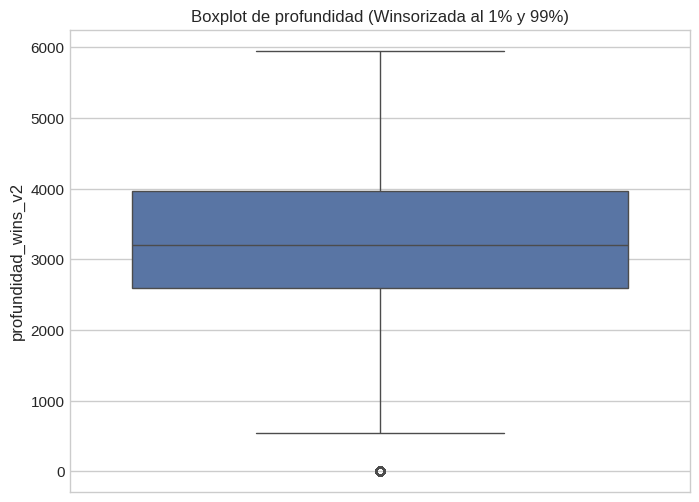

In [525]:
#Transformación por método winzorizado de Outliers en  Profundidad

print("\n--- Winsorizando 'profundidad' ---")

# Verificar si la columna 'profundidad' existe
if 'profundidad' in dataset2_10.columns:
    # Definir los límites para 'profundidad' (puedes ajustarlos según tu criterio)
    limite_inferior_profundidad = dataset2_10['profundidad'].quantile(0.01)
    limite_superior_profundidad = dataset2_10['profundidad'].quantile(0.99)

    # Aplicar Winsorizing a 'profundidad'
    dataset2_10['profundidad_wins_v2'] = np.where(dataset2_10['profundidad'] < limite_inferior_profundidad, limite_inferior_profundidad,
                                                 np.where(dataset2_10['profundidad'] > limite_superior_profundidad, limite_superior_profundidad,
                                                          dataset2_10['profundidad']))

    print(f"Límite inferior de 'profundidad': {limite_inferior_profundidad:.2f}")
    print(f"Límite superior de 'profundidad': {limite_superior_profundidad:.2f}")

    # Visualizar 'profundidad' después de Winsorizing
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=dataset2_10['profundidad_wins_v2'])
    plt.title('Boxplot de profundidad (Winsorizada al 1% y 99%)')
    plt.ylabel('profundidad_wins_v2')
    plt.show()
else:
    print("La columna 'profundidad' no se encontró en el DataFrame dataset2_10.")


In [526]:
# Z-score para outliers

import pandas as pd
from scipy import stats


variables_zscore = ['prod_gas_log', 'profundidad_wins_v2']

for variable in variables_zscore:
    if variable in dataset2_10.columns:
        # Calcular el Z-score
        dataset2_10[f'{variable}_zscore'] = np.abs(stats.zscore(dataset2_10[variable]))

        # Definir el umbral para considerar un outlier (puedes ajustarlo)
        umbral_z = 3

        # Identificar los outliers basados en el umbral
        outliers_zscore = dataset2_10[dataset2_10[f'{variable}_zscore'] > umbral_z]

        print(f"\n--- Outliers basados en Z-score (> {umbral_z}) en la columna '{variable}': ---")
        print(f"Número de outliers: {len(outliers_zscore)}")
        if not outliers_zscore.empty:
            print(outliers_zscore[[variable, f'{variable}_zscore']].head())
        else:
            print("No se encontraron outliers con este umbral.")
    else:
        print(f"La columna '{variable}' no se encuentra en el DataFrame.")


--- Outliers basados en Z-score (> 3) en la columna 'prod_gas_log': ---
Número de outliers: 0
No se encontraron outliers con este umbral.

--- Outliers basados en Z-score (> 3) en la columna 'profundidad_wins_v2': ---
Número de outliers: 0
No se encontraron outliers con este umbral.


Outliers positivos

Nuestra estrategia general se basa en:

- Transformar variables con muchos outliers y sesgo pronunciado para mejorar la distribución para el modelado.
- Acotar outliers menos numerosos o extremos para reducir su influencia manteniendo la mayoría de los datos.
- Investigar y eliminar outliers individuales extremos solo si hay una buena razón para creer que son errores.

Buscamos equilibrar la necesidad de manejar valores atípicos que puedan perjudicar el modelado con la importancia de preservar la información valiosa contenida en los datos.

**Encoding de Variables**

Dentro de nuestro dataset tenemos las siguientes categorías:


- 'tipoestado'
['Extracción Efectiva' 'Otras Situación Activo']

- 'sub_tipo_recurso'
['TIGHT' 'SHALE' 'Sin Datos']

- 'cuenca'
['NEUQUINA', 'AUSTRAL', 'GOLFO SAN JORGE']

- 'provincia'
['Neuquén', 'Rio Negro', 'Santa Cruz', 'Mendoza', 'Chubut']

In [527]:
pip install category_encoders

**DECISIÓN:** La variable 'tipoestado' se codificó de forma binaria para minimizar la creación de nuevas columnas, dada su naturaleza con un número limitado de categorías, se le asigna manualmente un valor. En contraste, las variables 'cuenca', 'provincia' y 'sub_tipo_recurso' se codificaron con One-Hot Encoding para evitar la introducción de un orden artificial entre sus categorías nominales y permitir que los modelos las interpreten de forma independiente, aunque esto implique una mayor dimensionalidad.

In [528]:
# 1. Codificación manual de 'tipoestado'
dataset2_10['tipoestado_bin'] = dataset2_10['tipoestado'].apply(lambda x: 1 if x == 'Extracción Activa' else 0)

# 2. One-Hot Encoding sin drop_first
dummies = pd.get_dummies(dataset2_10[['cuenca', 'provincia', 'sub_tipo_recurso']],
                         prefix=['cuenca', 'provincia', 'sub_tipo_recurso'])

# 3. Eliminar columnas categóricas originales
dataset2_10.drop(columns=['cuenca', 'provincia', 'sub_tipo_recurso'], inplace=True)


# 4. Concatenar las columnas codificadas al dataset original
dataset2_10 = pd.concat([dataset2_10, dummies], axis=1)

# 5. Convertir booleanas a enteros para que todo sea numérico
dataset2_10 = dataset2_10.astype({col: 'int' for col in dataset2_10.columns if dataset2_10[col].dtype == 'bool'})

# 6. Verificación
print(dataset2_10.dtypes)

anio                                   int64
mes                                    int64
idpozo                                 int64
prod_gas                             float64
iny_agua                             float64
iny_gas                              float64
iny_co2                              float64
tef                                  float64
tipoestado                          category
tipopozo                            category
profundidad                          float64
coordenadax                          float64
coordenaday                          float64
indice_tiempo                 datetime64[ns]
prod_gas_log                         float64
profundidad_wins_v2                  float64
prod_gas_log_zscore                  float64
profundidad_wins_v2_zscore           float64
tipoestado_bin                         int64
cuenca_AUSTRAL                         int64
cuenca_GOLFO SAN JORGE                 int64
cuenca_NEUQUINA                        int64
provincia_

**Normalización de variables**

In [529]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Columnas a normalizar
cols_to_standard_scale = ['prod_gas', 'profundidad']

# Inicializar el StandardScaler
standard_scaler = StandardScaler()

# Ajustar el escalador a los datos y transformar las columnas
dataset2_10[cols_to_standard_scale] = standard_scaler.fit_transform(dataset2_10[cols_to_standard_scale])

# Mostrar las primeras filas de las columnas normalizadas
print("\nPrimeras filas de las columnas normalizadas con StandardScaler:")
print(dataset2_10[cols_to_standard_scale].head())

# 🔎 Verificación después del concat
print("¿tipoestado está presente después del concat?", 'tipoestado' in dataset2_10.columns)
print("Columnas categóricas actuales:", dataset2_10.select_dtypes(include='category').columns.tolist())


Primeras filas de las columnas normalizadas con StandardScaler:
   prod_gas  profundidad
0 -0.234666    -0.069743
1  2.241143    -0.230741
2  0.088969     0.046040
3  2.714597    -0.221594
4 -0.516368    -0.031192
¿tipoestado está presente después del concat? True
Columnas categóricas actuales: ['tipoestado', 'tipopozo']


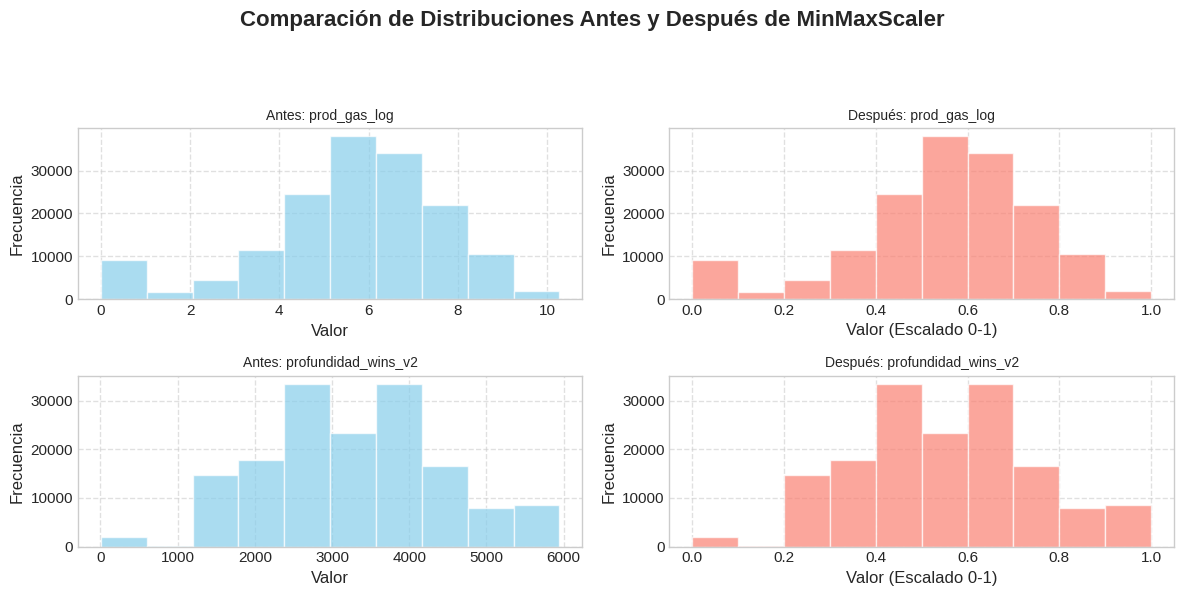

In [530]:
# Gráficos comparativos antes y despues de normalizar

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Columnas a normalizar
cols_to_scale = ['prod_gas_log','profundidad_wins_v2' ]

# Crear copias de las columnas originales para la comparación
dataset_before_scaling = dataset2_10.copy()[cols_to_scale]

# Inicializar el MinMaxScaler
minmax_scaler = MinMaxScaler()

# Ajustar el escalador a los datos y transformar las columnas
dataset2_encoded_scaled = dataset2_10.copy()
dataset2_encoded_scaled.loc[:, cols_to_scale] = minmax_scaler.fit_transform(dataset2_encoded_scaled.loc[:, cols_to_scale])

# Número de variables a graficar
num_cols = len(cols_to_scale)

# Crear la figura y los subplots (2 columnas: antes y después)
fig, axes = plt.subplots(num_cols, 2, figsize=(12, 3 * num_cols))
fig.suptitle('Comparación de Distribuciones Antes y Después de MinMaxScaler', fontsize=16, fontweight='bold', y=1.02)

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas y graficar los histogramas
for i, col in enumerate(cols_to_scale):
    # Histograma ANTES de la normalización (subplot izquierdo)
    axes[(i * 2)].hist(dataset_before_scaling.loc[:, col], bins=10, color='skyblue', alpha=0.7, edgecolor='white')
    axes[(i * 2)].set_title(f'Antes: {col}', fontsize=10)
    axes[(i * 2)].set_xlabel('Valor')
    axes[(i * 2)].set_ylabel('Frecuencia')
    axes[(i * 2)].grid(True, linestyle='--', alpha=0.6)

    # Histograma DESPUÉS de la normalización (subplot derecho)
    axes[(i * 2) + 1].hist(dataset2_encoded_scaled.loc[:, col], bins=10, color='salmon', alpha=0.7, edgecolor='white')
    axes[(i * 2) + 1].set_title(f'Después: {col}', fontsize=10)
    axes[(i * 2) + 1].set_xlabel('Valor (Escalado 0-1)')
    axes[(i * 2) + 1].set_ylabel('Frecuencia')
    axes[(i * 2) + 1].grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout para evitar superposiciones
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Inspección Dataset2_10**

Se realiza una última inspección previo a la exportar el dataset editado

In [531]:
#Inspección Básica Dataset2_10
dataset2_10.head()

,anio,mes,idpozo,prod_gas,iny_agua,iny_gas,iny_co2,tef,tipoestado,tipopozo,...,cuenca_GOLFO SAN JORGE,cuenca_NEUQUINA,provincia_Chubut,provincia_Mendoza,provincia_Neuquén,provincia_Rio Negro,provincia_Santa Cruz,sub_tipo_recurso_SHALE,sub_tipo_recurso_Sin Datos,sub_tipo_recurso_TIGHT
0,2014,1,145547,-0.234666,0.0,0.0,0.0,30.88,Extracción Efectiva,Gasífero,...,0,1,0,0,1,0,0,0,0,1
1,2014,1,137345,2.241143,0.0,0.0,0.0,31.00,Extracción Efectiva,Gasífero,...,0,1,0,0,1,0,0,0,0,1
2,2014,1,144008,0.088969,0.0,0.0,0.0,31.00,Extracción Efectiva,Gasífero,...,0,1,0,0,0,1,0,0,0,1
3,2014,1,144470,2.714597,0.0,0.0,0.0,31.00,Extracción Efectiva,Gasífero,...,0,1,0,0,1,0,0,0,0,1
4,2014,1,137075,-0.516368,0.0,0.0,0.0,31.00,Extracción Efectiva,Gasífero,...,0,1,0,0,1,0,0,0,0,1


In [532]:
#Inspección Básica Dataset2_10
dataset2_10.shape

(157780, 30)

In [533]:
#Inspección Básica Dataset2_10
dataset2_10.columns

Index(['anio', 'mes', 'idpozo', 'prod_gas', 'iny_agua', 'iny_gas', 'iny_co2',
       'tef', 'tipoestado', 'tipopozo', 'profundidad', 'coordenadax',
       'coordenaday', 'indice_tiempo', 'prod_gas_log', 'profundidad_wins_v2',
       'prod_gas_log_zscore', 'profundidad_wins_v2_zscore', 'tipoestado_bin',
       'cuenca_AUSTRAL', 'cuenca_GOLFO SAN JORGE', 'cuenca_NEUQUINA',
       'provincia_Chubut', 'provincia_Mendoza', 'provincia_Neuquén',
       'provincia_Rio Negro', 'provincia_Santa Cruz', 'sub_tipo_recurso_SHALE',
       'sub_tipo_recurso_Sin Datos', 'sub_tipo_recurso_TIGHT'],
      dtype='object')

In [534]:
#Inspección Básica Dataset2_10
dataset2_10.isnull().sum()

,0
anio,0
mes,0
idpozo,0
prod_gas,0
iny_agua,0
iny_gas,0
iny_co2,0
tef,0
tipoestado,0
tipopozo,0


In [535]:
#Inspección Básica Dataset2_10
dataset2_10.dtypes

,0
anio,int64
mes,int64
idpozo,int64
prod_gas,float64
iny_agua,float64
iny_gas,float64
iny_co2,float64
tef,float64
tipoestado,category
tipopozo,category


Se elimina:
* 'tipoestado' ya que nos interesa 'tipoestado_bin' que transformamos previamente.
* 'tipopozo' dado que filtramos y sólo nos quedamos con la categoría Gasífero
* 'indice_tiempo' ya que basaremos nuestro modelo de predicción en 'anio' y/o 'mes'

In [536]:
dataset2_10.drop(columns=['tipoestado', 'tipopozo', 'indice_tiempo'], inplace=True)
print(dataset2_10.columns)

Index(['anio', 'mes', 'idpozo', 'prod_gas', 'iny_agua', 'iny_gas', 'iny_co2',
       'tef', 'profundidad', 'coordenadax', 'coordenaday', 'prod_gas_log',
       'profundidad_wins_v2', 'prod_gas_log_zscore',
       'profundidad_wins_v2_zscore', 'tipoestado_bin', 'cuenca_AUSTRAL',
       'cuenca_GOLFO SAN JORGE', 'cuenca_NEUQUINA', 'provincia_Chubut',
       'provincia_Mendoza', 'provincia_Neuquén', 'provincia_Rio Negro',
       'provincia_Santa Cruz', 'sub_tipo_recurso_SHALE',
       'sub_tipo_recurso_Sin Datos', 'sub_tipo_recurso_TIGHT'],
      dtype='object')


In [537]:
dataset2_10.to_csv('dataset2_editado.csv', index=False)